In this project, we aim at predicting the price for renting a AirBnb 2-room apartment in Manhattan. We use the AirBnb dataset which contatins several features like neighborhood group, cancellation policy, room type, etc. for the same.


In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from p_decision_tree.DecisionTree import DecisionTree
import pydotplus
import sklearn
import networkx
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import LinearSVR
import warnings
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import silhouette_score

## Exploring the Data Set 

In [3]:
df = pd.read_csv("AirBnB_original.csv")
df.head()

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1001254,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,193.0,7.0,9.0,4.0,6.0,1
1,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,28.0,7.0,45.0,4.0,2.0,2
2,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005.0,620,124.0,3.0,0.0,5.0,1.0,1
3,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005.0,368,74.0,7.0,270.0,4.0,1.0,2
4,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,41.0,7.0,9.0,3.0,1.0,1


In [4]:
df.shape

(72709, 19)

In [5]:
df.describe()

,id,host id,lat,long,instant bookable,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
count,7.270900e+04,7.270900e+04,72701.000000,72701.00000,72709.0,72563.000000,72709.000000,72552.000000,72397.000000,72615.000000,72466.000000,72504.000000,72709.000000
mean,2.822362e+07,4.915231e+10,40.727697,-73.94817,0.0,2012.490856,625.244041,125.033066,3.403939,33.077697,3.291889,9.866214,1.449119
std,1.596755e+07,2.851970e+10,0.057033,0.05239,0.0,5.770828,331.187737,66.232569,2.276835,53.707868,1.277752,36.990501,0.801373
min,1.001254e+06,1.297566e+08,40.499790,-74.24984,0.0,2003.000000,50.000000,10.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1.459510e+07,2.448424e+10,40.687770,-73.98312,0.0,2008.000000,340.000000,68.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.843629e+07,4.889969e+10,40.722540,-73.95398,0.0,2012.000000,625.000000,125.000000,3.000000,11.000000,3.000000,1.000000,1.000000
75%,4.136894e+07,7.380985e+10,40.762920,-73.92987,0.0,2018.000000,912.000000,182.000000,5.000000,41.000000,4.000000,3.000000,2.000000
max,5.736742e+07,9.876268e+10,40.916970,-73.70522,0.0,2022.000000,1200.000000,240.000000,7.000000,1010.000000,5.000000,332.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72709 entries, 0 to 72708
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              72709 non-null  int64  
 1   host id                         72709 non-null  int64  
 2   neighborhood group              72709 non-null  object 
 3   neighborhood                    72697 non-null  object 
 4   lat                             72701 non-null  float64
 5   long                            72701 non-null  float64
 6   country                         72338 non-null  object 
 7   country code                    72623 non-null  object 
 8   instant bookable                72709 non-null  int64  
 9   cancellation policy             72664 non-null  object 
 10  room type                       72709 non-null  object 
 11  construction year               72563 non-null  float64
 12  price                           

### Basic Cleaning

In [7]:
print('NaN Count present in each column: ')
df.isna().sum()

NaN Count present in each column: 


id                                  0
host id                             0
neighborhood group                  0
neighborhood                       12
lat                                 8
long                                8
country                           371
country code                       86
instant bookable                    0
cancellation policy                45
room type                           0
construction year                 146
price                               0
service fee                       157
minimum nights                    312
number of reviews                  94
review rate number                243
calculated host listings count    205
number rooms                        0
dtype: int64

In [8]:
df.fillna('NaN')
df_new = df.dropna()

print('The number of rows with atleast 1 NaN value is: ', df.shape[0] - df_new.shape[0])

The number of rows with atleast 1 NaN value is:  1477


<font color='green'>=> 1477 rows were removed from the dataset since they had atleast one missing value</font>

In [9]:
df_filtered = df_new.drop_duplicates(subset = 'id', keep = 'first')

print('Number of duplicates removed :', df_new.shape[0] - df_filtered.shape[0])

Number of duplicates removed : 389


<font color='green'>=> We found 389 duplicated flats in the dataset and removed them by keeping the first most entry only.</font>

In [10]:
df_cleaned = pd.read_csv('AirBnB_cleaned.csv')
df_cleaned.head()

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007,142,28,7,45,4,2,2
1,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005,620,124,3,0,5,1,1
2,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005,368,74,7,270,4,1,2
3,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009,204,41,7,9,3,1,1
4,1004650,61300605564,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2015,71,14,7,49,5,1,1


In [11]:
df_cleaned.price.describe()

count    70842.000000
mean       625.463680
std        331.236241
min         50.000000
25%        340.000000
50%        625.000000
75%        913.000000
max       1200.000000
Name: price, dtype: float64

In [12]:
mean = np.mean(df_cleaned['price'])
first = np.quantile(df_cleaned['price'], 0.25)
third = np.quantile(df_cleaned['price'],0.75)
std=np.std(df_cleaned['price'])
print ("Mean : {}\nFirst Quartile : {}\nThird Quartile : {}\nStandard Deviation : {}".format(mean,first,third,std))

Mean : 625.4636797380085
First Quartile : 340.0
Third Quartile : 913.0
Standard Deviation : 331.2339031651564


<AxesSubplot: xlabel='price'>

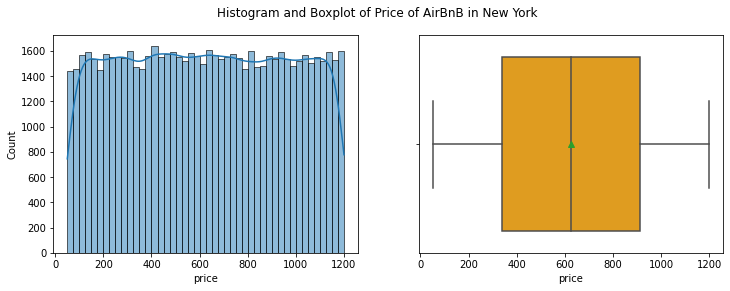

In [13]:

fig, axs = plt.subplots(ncols=2, figsize = (12,4))
fig.suptitle('Histogram and Boxplot of Price of AirBnB in New York')
sns.histplot(data = df_cleaned['price'], ax = axs[0], binwidth = 25, kde = True)
sns.boxplot(x = df_cleaned['price'], ax = axs[1], color = 'orange', showmeans = True)

<font color='green'>=> From the histogram representation, we can conclude that the 'price' resembles a uniform distribution curve. Furthermore, from the boxplot we can interpret the mean price of apartments as well as the quartile values. It is also worth noting that no outliers are visible in the boxplot for the given feature.<br><br>

### Exploring Price Relationships

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.


<font color = 'green'> Firstly, we can elimiate the `price` column as that is the target variable.<br>
    
<font color = 'green'> We do not need to consider the `id` since it would be uncorrelated to the price as it just gives a unique id to each apartment.<br>

<font color = 'green'> Similarly we can eliminate `host id` as well for the same reason as that of `id`.<br>

<font color = 'green'> `country_code` and `country` will also not be applicable as we will be filtering on only NYC and this value is same for all the samples and hence it will not influence the price.<br>

<font color = 'green'> `lat` and `long` will not be valuable - more general neighborhood is valuable.</font>

In [14]:
df_cleaned['instant bookable'].unique()

array([0], dtype=int64)

<font color = 'green'> `instant bookable` also doesn't impact pricing since it has only one value for all the samples.</font>

In [15]:
df_heatmap = df_cleaned[['price', 'neighborhood group', 'neighborhood', 'cancellation policy', 'room type', 
                         'construction year', 'service fee', 'minimum nights', 'number of reviews', 
                         'review rate number', 'number rooms']]
df_heatmap.head()

,price,neighborhood group,neighborhood,cancellation policy,room type,construction year,service fee,minimum nights,number of reviews,review rate number,number rooms
0,142,Manhattan,Midtown,moderate,Entire home/apt,2007,28,7,45,4,2
1,620,Manhattan,Harlem,flexible,Private room,2005,124,3,0,5,1
2,368,Brooklyn,Clinton Hill,moderate,Entire home/apt,2005,74,7,270,4,2
3,204,Manhattan,East Harlem,moderate,Entire home/apt,2009,41,7,9,3,1
4,71,Brooklyn,Bedford-Stuyvesant,moderate,Private room,2015,14,7,49,5,1


<AxesSubplot:>

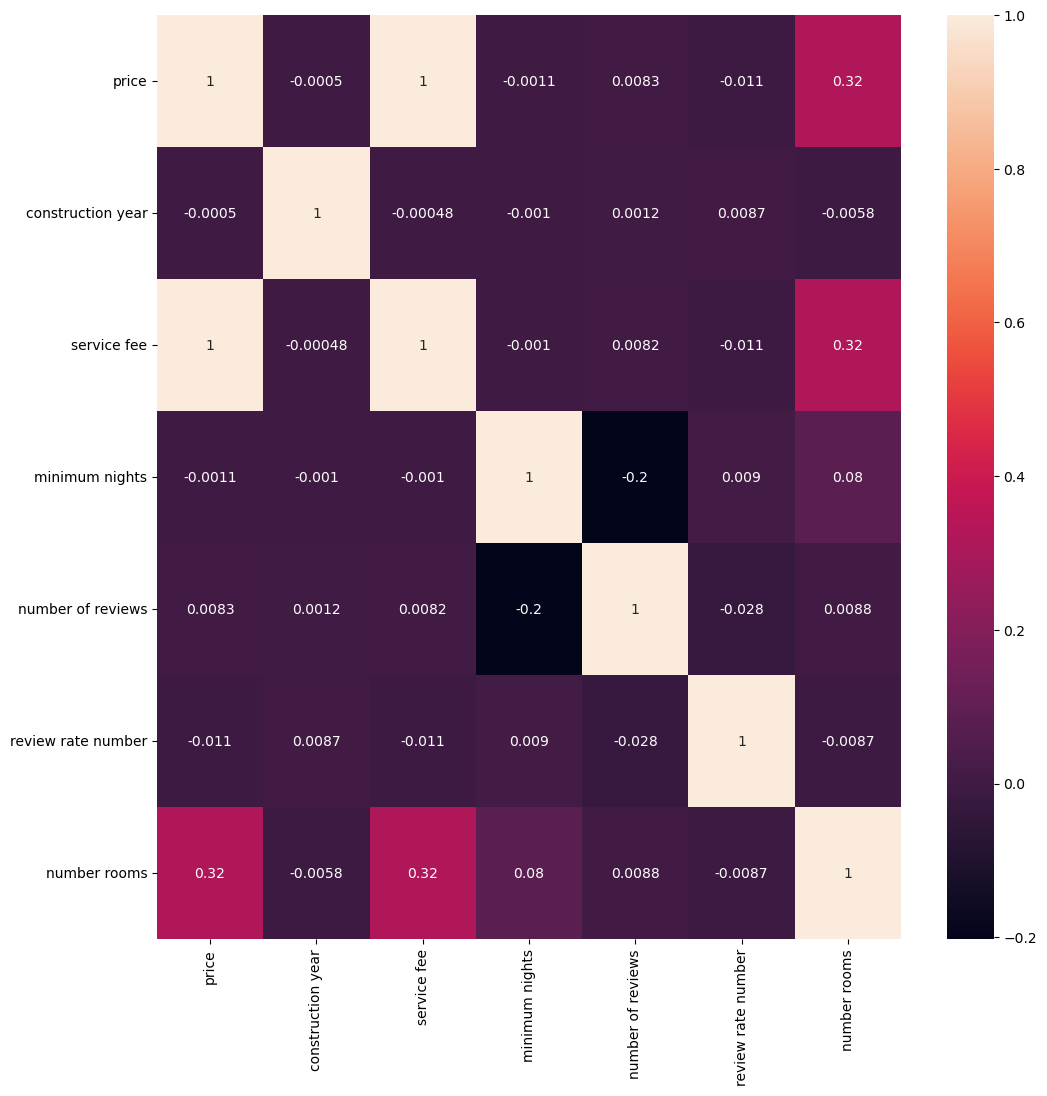

In [15]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_heatmap.corr(), annot = True)

<font color = 'green'> As we can see from the correlation matrix, `service fee` is strongly correlated to `price` and hence can be used for understanding the change in pricing decision.</font> <br>

<font color = 'green'> `Number of rooms` has a correlation of `0.32` with `price` and hence can be used for understanding the change in pricing decision.</font><br>

<font color = 'green'> `Minimum Nights` has a very low correlation of `-0.0011` and hence cannot be used for understanding the change in pricing decision.</font><br>

<font color = 'green'> `number of reviews` has a correlation of `0.0083` with `price` and hence cannot be used for understanding the change in pricing decision.</font><br>

<font color = 'green'>Since rest of the features do not have a high correlation score, hence cannot be used to predict price.</font>

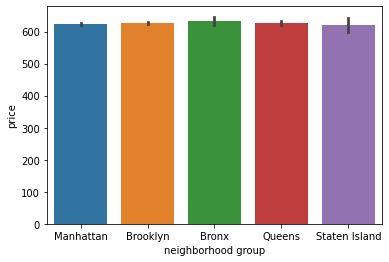

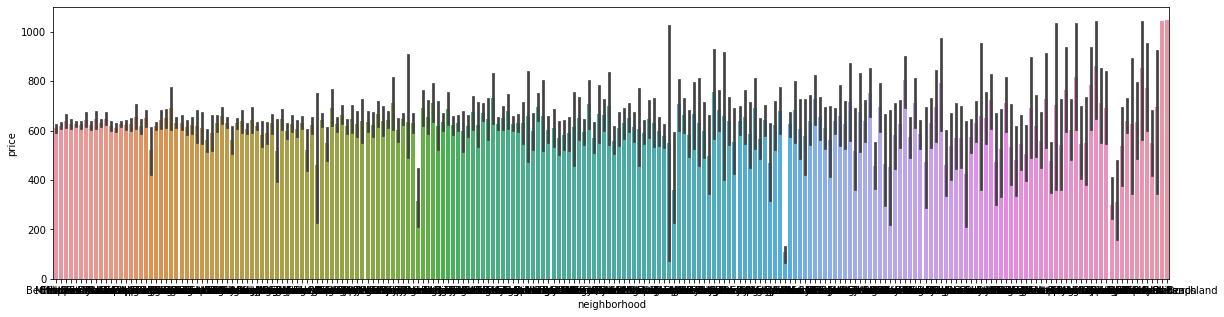

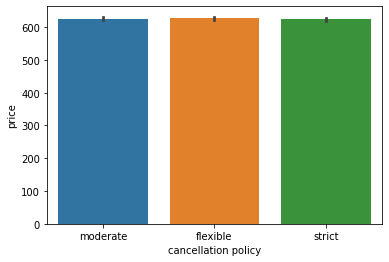

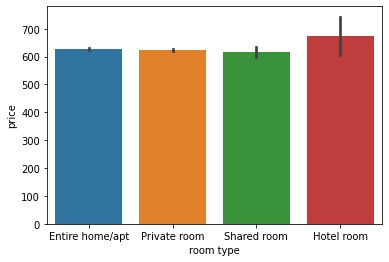

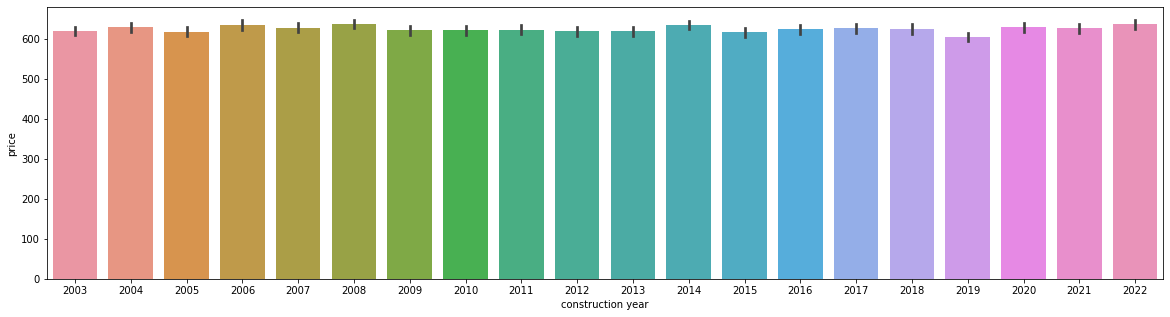

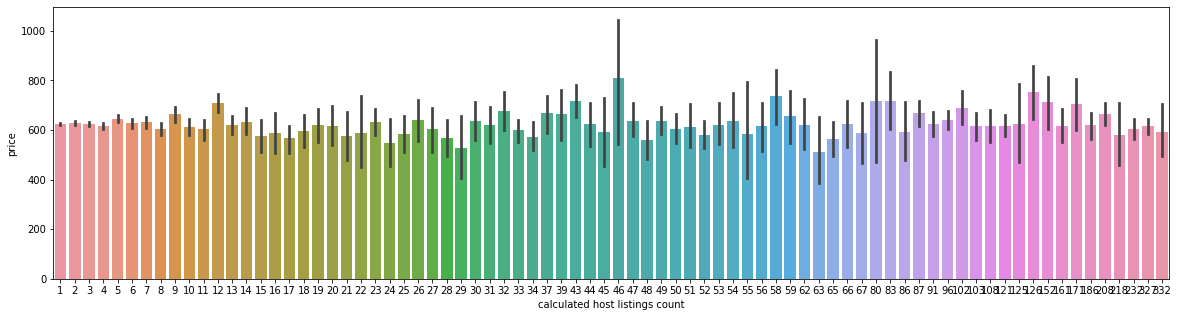

In [118]:
sns.barplot(data=df_cleaned, x = 'neighborhood group' , y = 'price')
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(data=df_cleaned, x = 'neighborhood' , y = 'price')
plt.show()

sns.barplot(data=df_cleaned, x = 'cancellation policy' , y = 'price')
plt.show()

sns.barplot(data=df_cleaned, x = 'room type' , y = 'price')
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(data=df_cleaned, x = 'construction year' , y = 'price')
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(data=df_cleaned, x = 'calculated host listings count' , y = 'price')
plt.show()


<font color = 'green'> As seen from the above graphs there is no significant pattern for the features: `neighbourhood group`, `construction year`, `review rate number`, `cancellation policy` and hence cannot be used for predicting price.</font> <br>

<font color = 'green'> We can use `room type`, `neighbourhood`, `host listings` for predicting the price since their mean values are varying for each category. </font>

<font color = 'green'> According to our analysis, we can consider `service fee`, `number of rooms`, `room type`, `neighbourhood` and `host listings` for predicting price of the apartments.</font>

### Univariate Analysis

In [17]:
df_cleaned_subset = df_cleaned[[
    'id', 'service fee', 'minimum nights', 'neighborhood group', 'room type', 
    'cancellation policy', 'construction year', 'number rooms', 'price'
]]

In [18]:
df_cleaned_subset

,id,service fee,minimum nights,neighborhood group,room type,cancellation policy,construction year,number rooms,price
0,1002102,28,7,Manhattan,Entire home/apt,moderate,2007,2,142
1,1002403,124,3,Manhattan,Private room,flexible,2005,1,620
2,1002755,74,7,Brooklyn,Entire home/apt,moderate,2005,2,368
3,1003689,41,7,Manhattan,Entire home/apt,moderate,2009,1,204
4,1004650,14,7,Brooklyn,Private room,moderate,2015,1,71
...,...,...,...,...,...,...,...,...,...
70837,57353610,21,7,Queens,Private room,moderate,2007,1,103
70838,57358028,196,1,Queens,Private room,strict,2022,1,982
70839,57358580,189,1,Queens,Private room,moderate,2020,1,946
70840,57359685,209,2,Manhattan,Entire home/apt,flexible,2020,1,1043


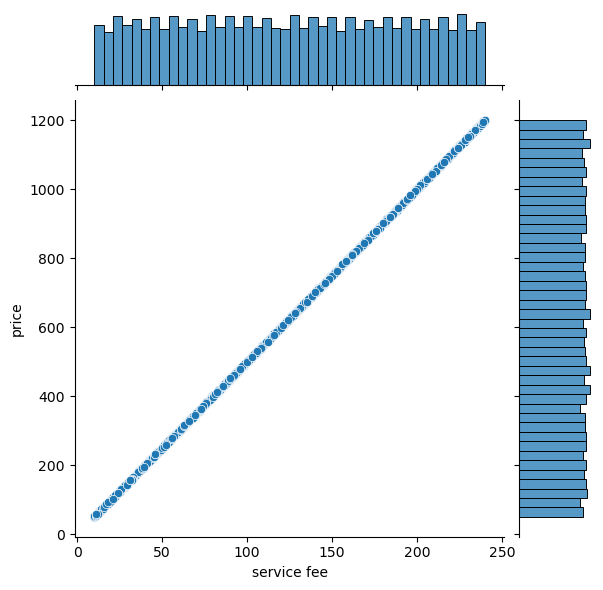

In [23]:

sns.jointplot(data = df_cleaned_subset, x = 'service fee', y = 'price', marker = 'o')


<font color = 'green'> Service Fee and Price are directly and linearly coorelated and therefore, is a helpful feature for our pricing decision.</font>

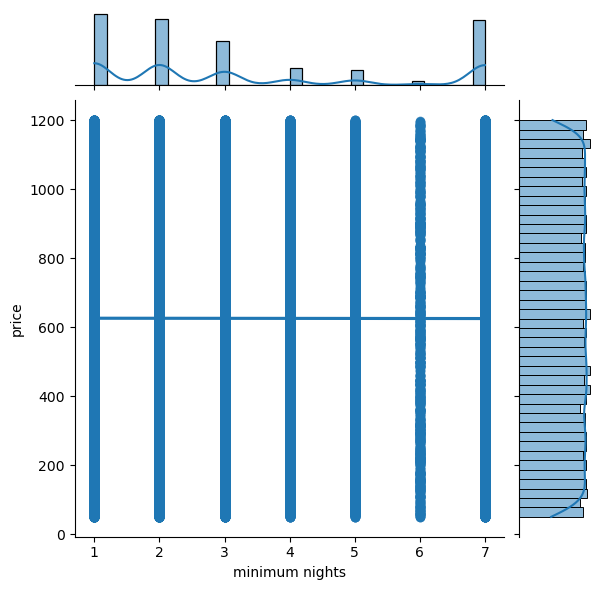

In [24]:

sns.jointplot(data=df_cleaned_subset, x="minimum nights", y="price", kind="reg")

_Answer:_

<font color = 'green'>Minimum night doesn't show any pattern with price.</font>

<AxesSubplot:xlabel='neighborhood group', ylabel='price'>

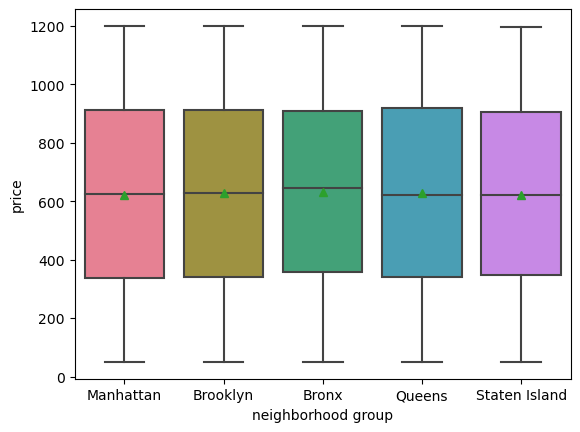

In [26]:

sns.boxplot(x = df_cleaned_subset['neighborhood group'],
            y = df_cleaned_subset['price'],
            palette = 'husl', showmeans = True)

<AxesSubplot:xlabel='room type', ylabel='price'>

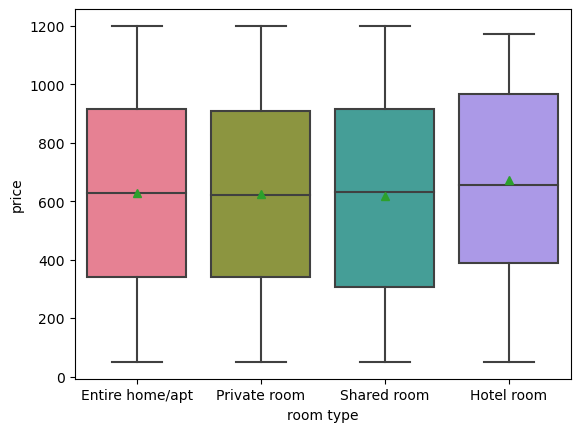

In [27]:
sns.boxplot(x = df_cleaned_subset['room type'],
            y = df_cleaned_subset['price'],
            palette = 'husl', showmeans = True)

<AxesSubplot:xlabel='cancellation policy', ylabel='price'>

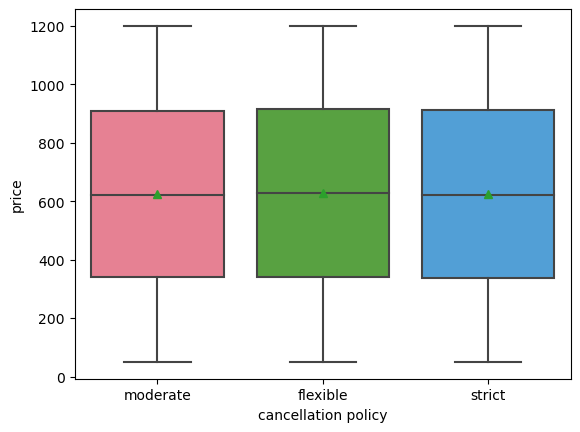

In [28]:
sns.boxplot(x = df_cleaned_subset['cancellation policy'],
            y = df_cleaned_subset['price'],
            palette = 'husl', showmeans = True)

<AxesSubplot:xlabel='construction year', ylabel='price'>

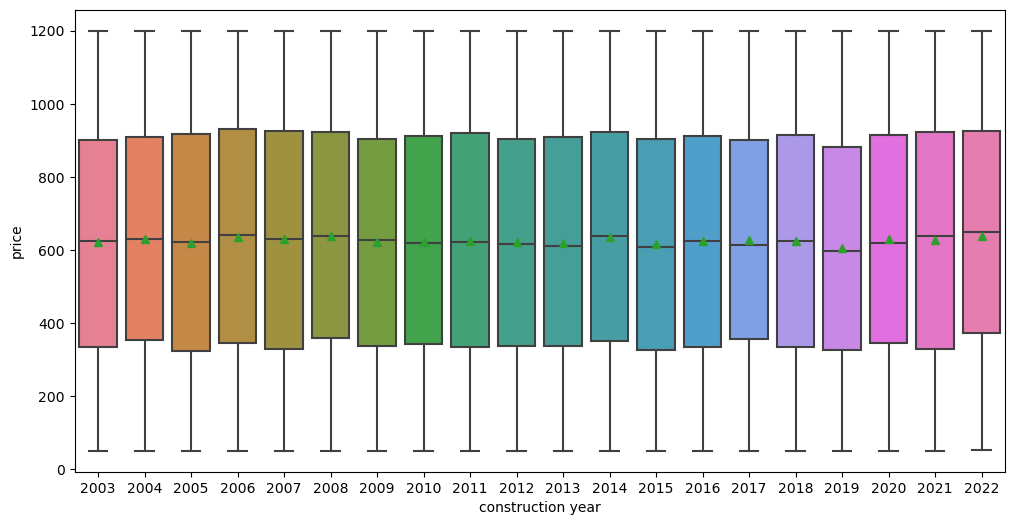

In [29]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df_cleaned_subset['construction year'],
            y = df_cleaned_subset['price'],
            palette = 'husl', showmeans = True)

<AxesSubplot:xlabel='number rooms', ylabel='price'>

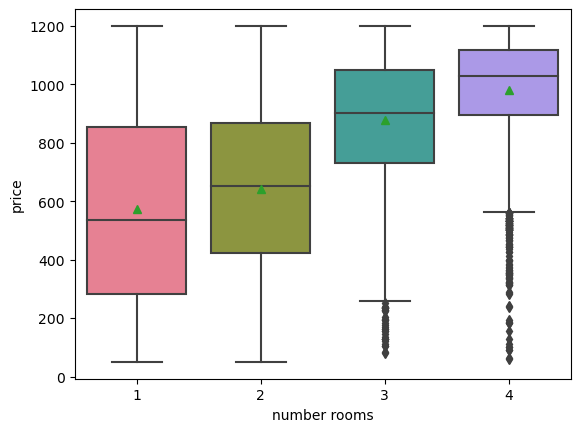

In [30]:
sns.boxplot(x = df_cleaned_subset['number rooms'],
            y = df_cleaned_subset['price'],
            palette = 'husl', showmeans = True)



<font color = 'green'>Number of rooms have a very clear relationship with price, with the median for high no. of rooms having high price.</font><br>
<font color = 'green'>Room type has some relation with price as it changes for Hotel Room.</font>
<font color = 'green'>Construction year, cancellation policy and neighborhood seem to be uniform and does not show any relationship with price.</font>

### Multivariate Analysis

In [19]:
df_cleaned_subset = df_cleaned[[
    'id', 'neighborhood group', 'room type', 'cancellation policy',
    'construction year', 'number rooms', 'price'
]]

#### Multivariate Analysis for Neighborhood Group 

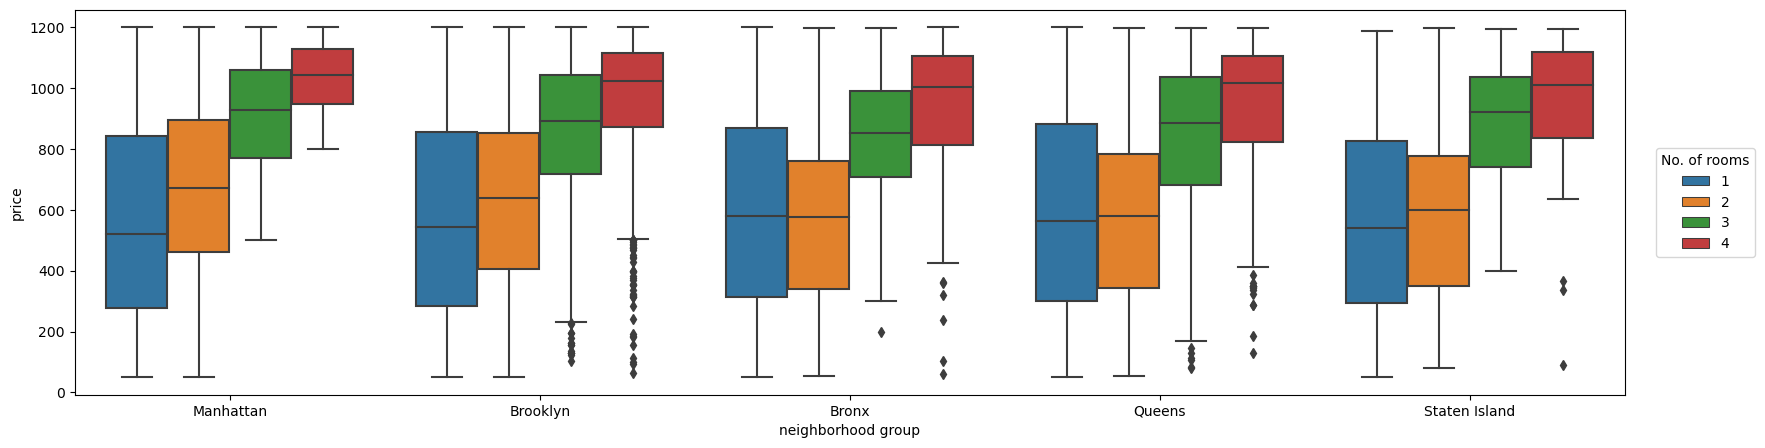

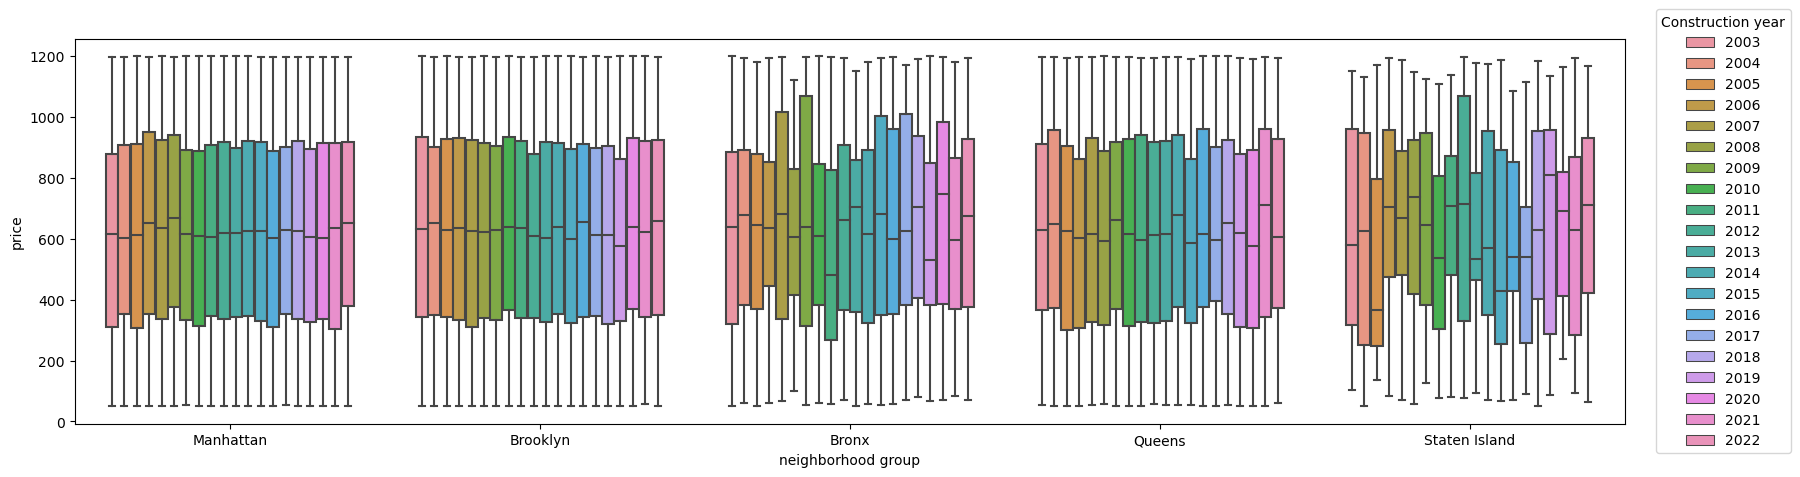

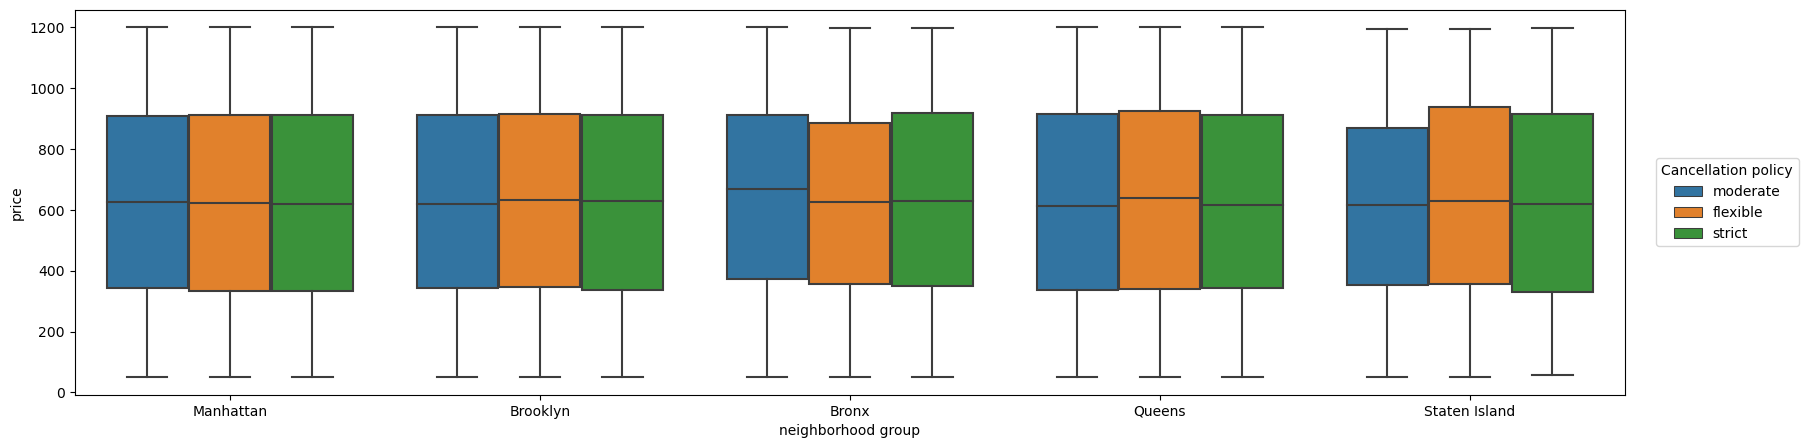

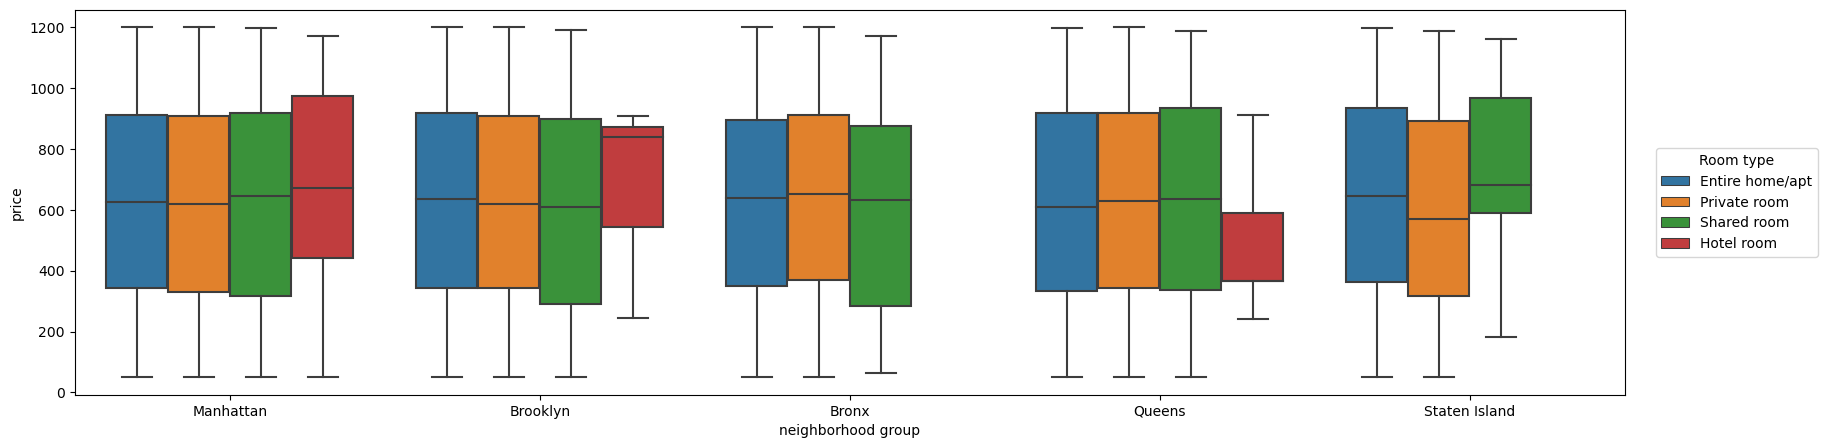

In [32]:

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='neighborhood group',y='price',hue='number rooms')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='No. of rooms')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='neighborhood group',y='price',hue='construction year')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='Construction year')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='neighborhood group',y='price',hue='cancellation policy')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='Cancellation policy')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='neighborhood group',y='price',hue='room type')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='Room type')
plt.show()


_Answer:_

<font color = 'green'>We can consider the feature pairs `Neighbourhood Group` and `Number of Rooms` for price prediction as the boxplots show pattern.</font><br>
<font color = 'green'>We can also consider the feature pairs `Neighbourhood Group` and `Room Type` for price prediction as the boxplots show pattern.</font>

<font color = 'green'>We do not consider other combinations since they do not show any relationship with each other.</font>

#### Multivariate Analysis for Room Type

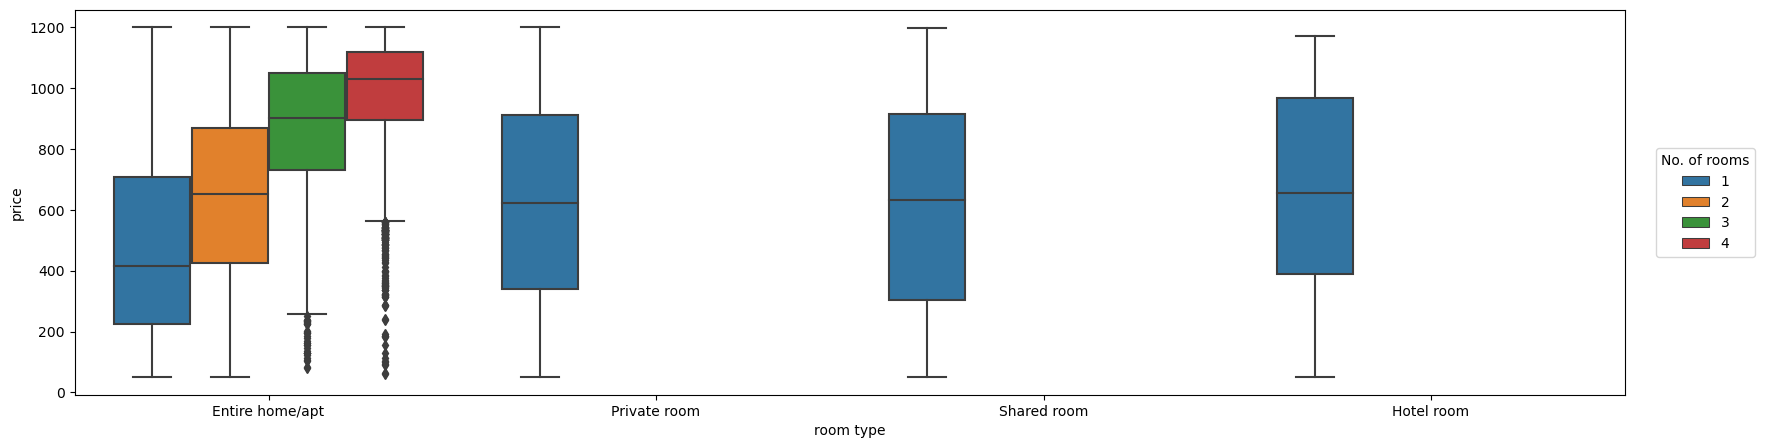

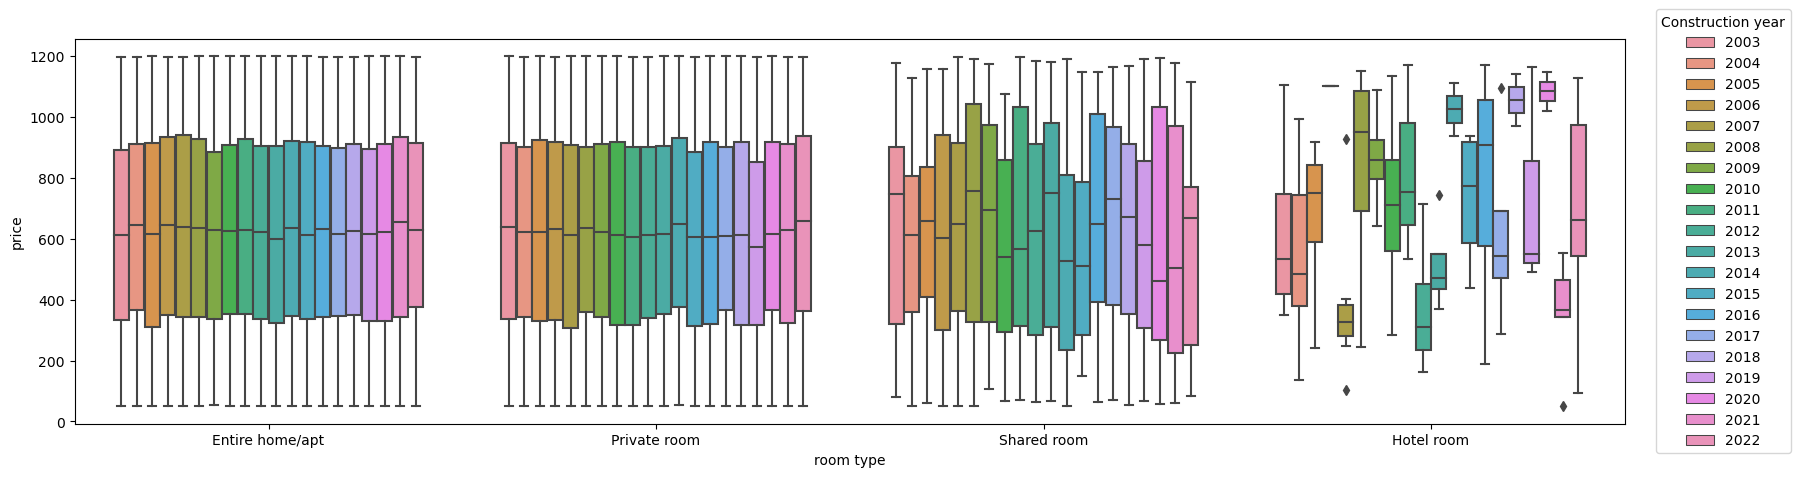

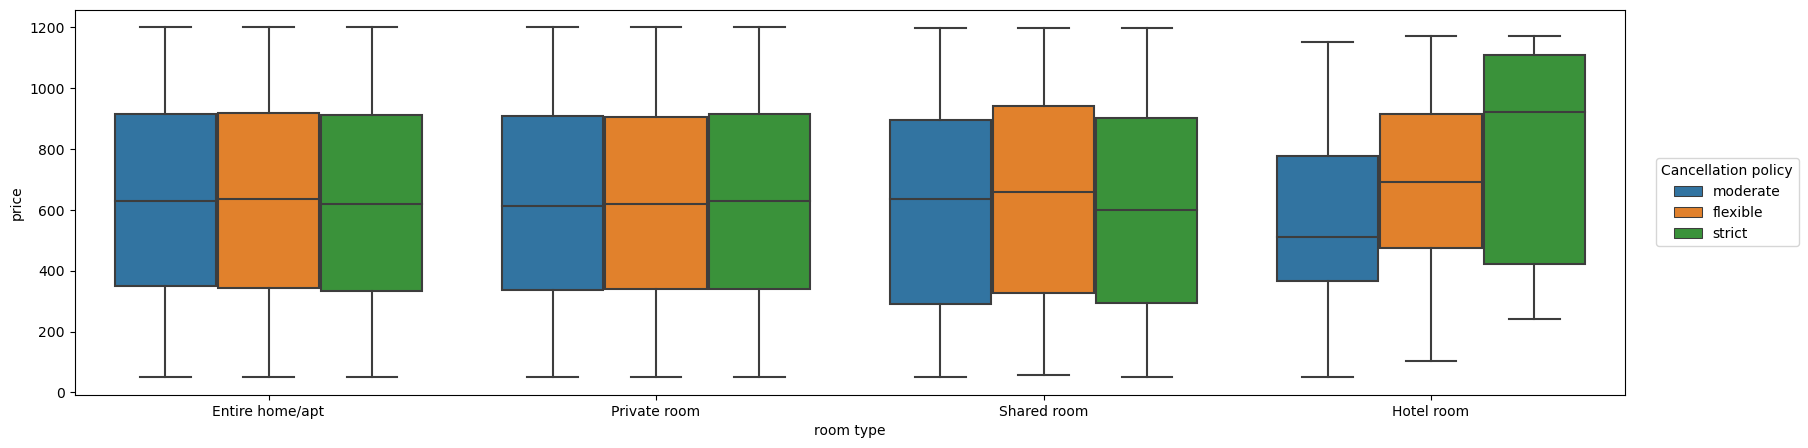

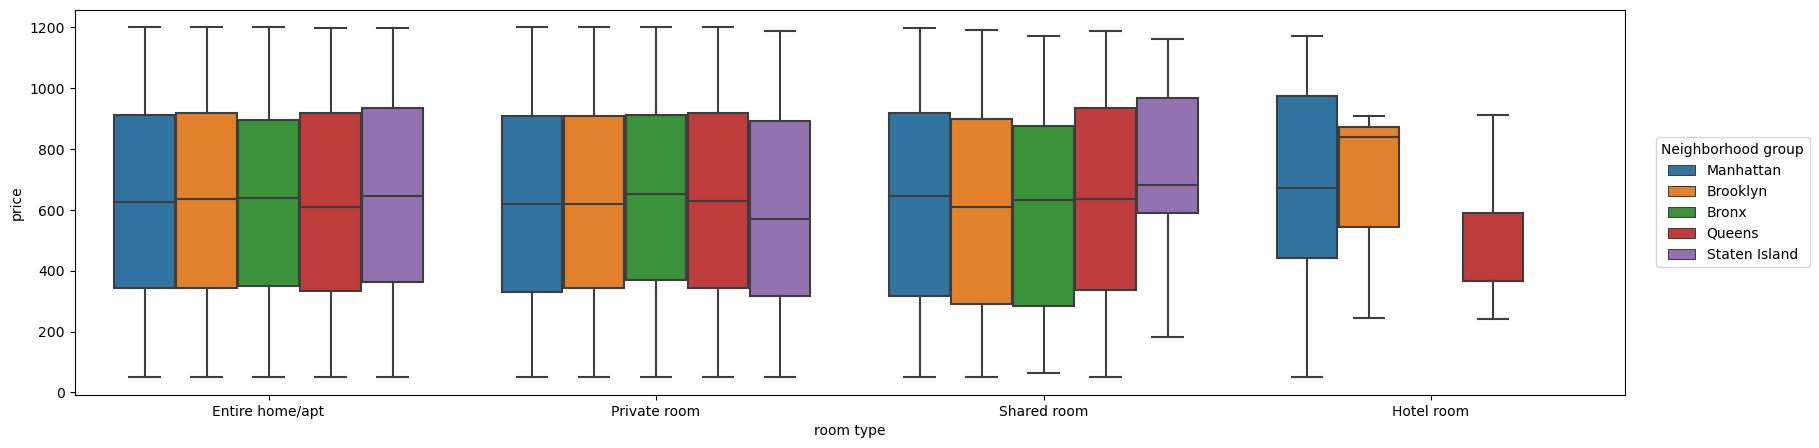

In [33]:

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='room type',y='price',hue='number rooms')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='No. of rooms')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='room type',y='price',hue='construction year')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='Construction year')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='room type',y='price',hue='cancellation policy')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='Cancellation policy')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='room type',y='price',hue='neighborhood group')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='Neighborhood group')
plt.show()



<font color = 'green'>In room type vs No. of rooms boxplots, we can observe significant pattern only when the room type is `Entire Home/Apartment`. For other room types, there isn't data available other than `No. of rooms` = 1 <br></font>


<font color = 'green'>For Construction year and cancellation policy significant patterns are most noticable for hotels only.</font>

<font color = 'green'>For `room type` vs `neighbourhood group` there is not much variation in the boxplots for `entire home/apt` and `Private room`. Hence this is also not a good feature pair to predict the price.</font>

#### Multivariate Analysis for Number of Rooms

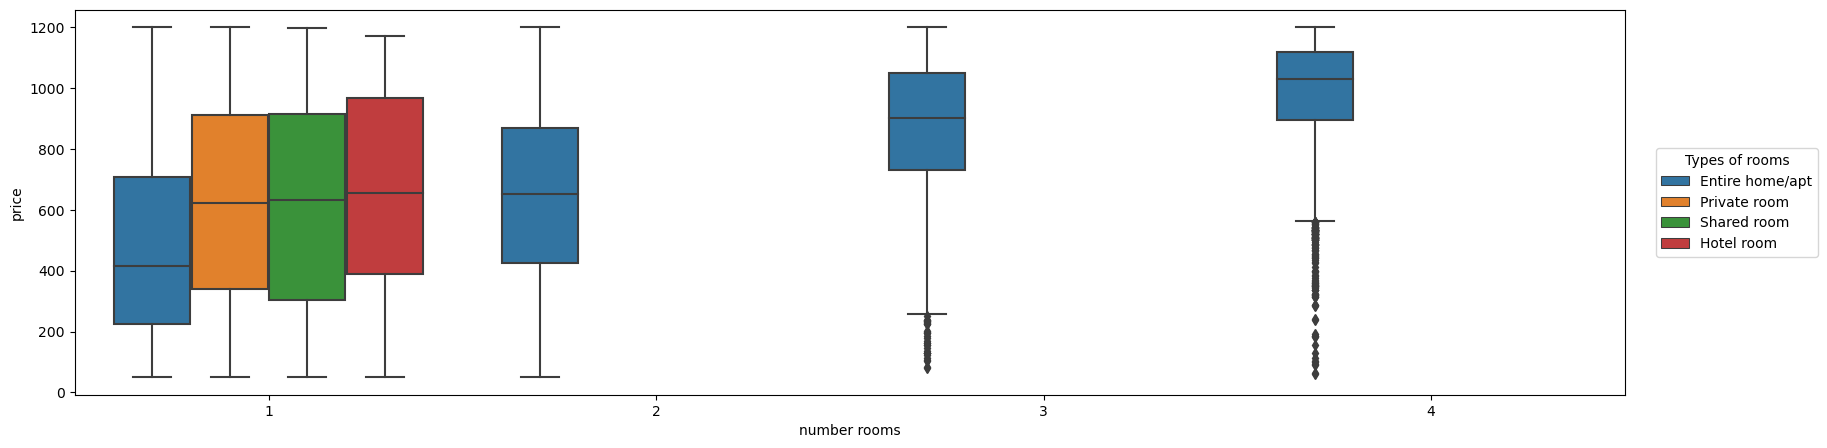

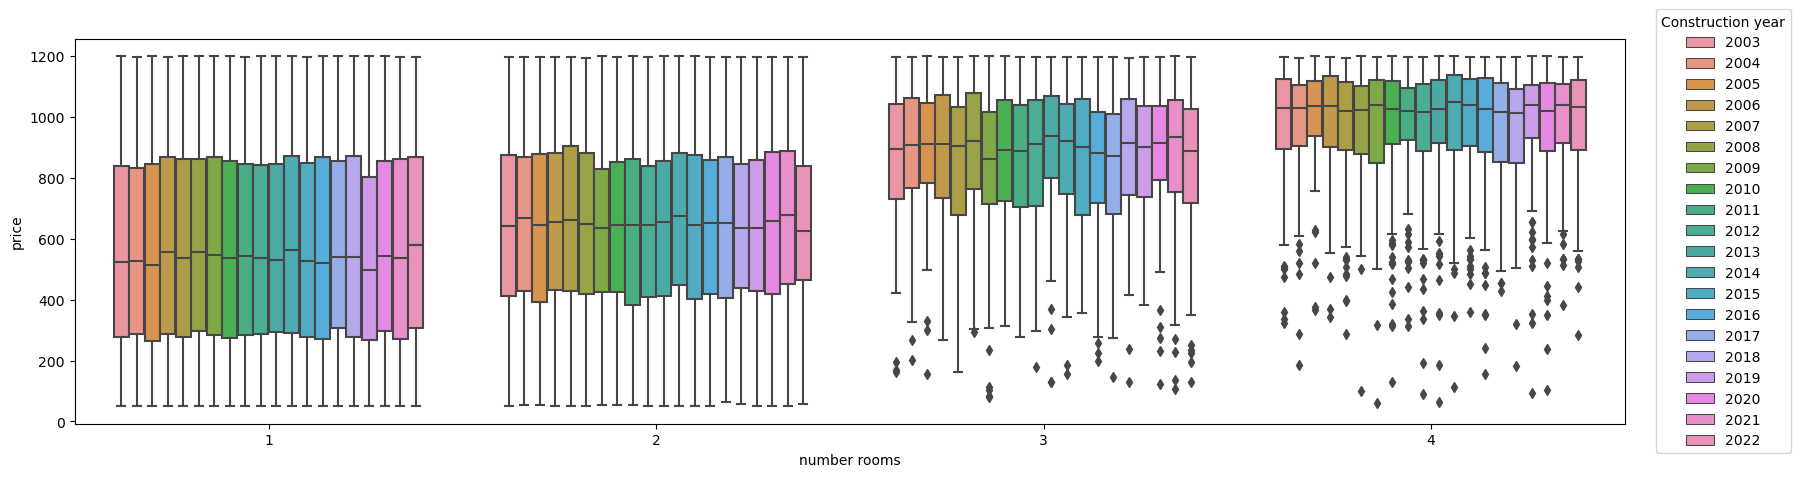

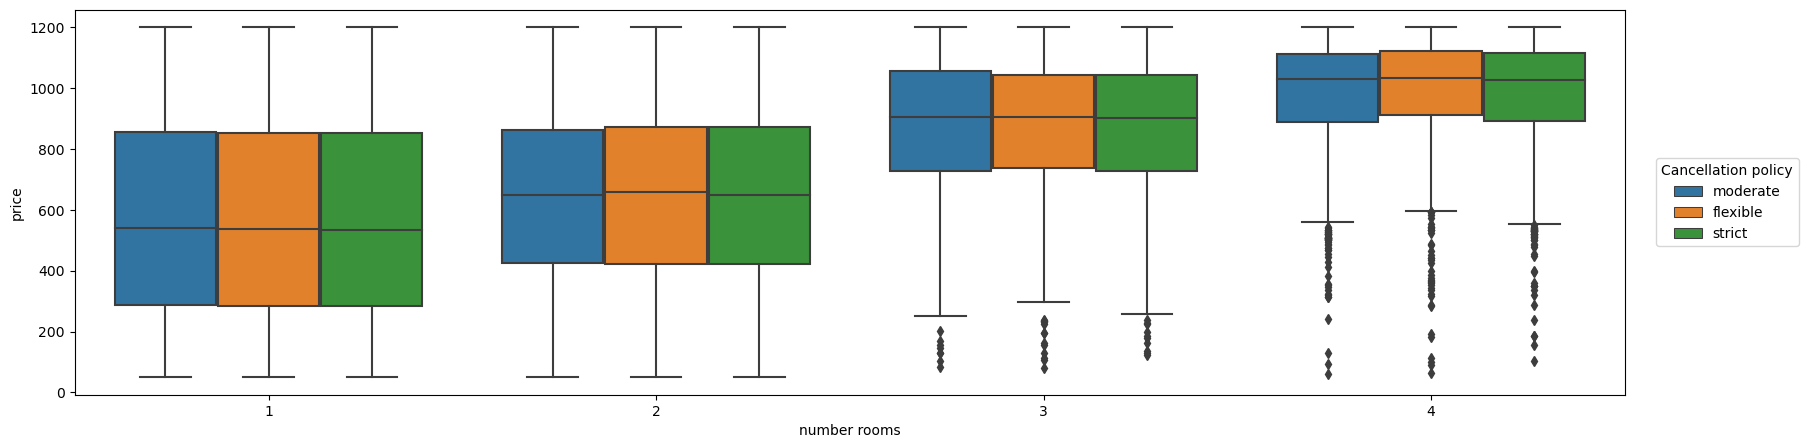

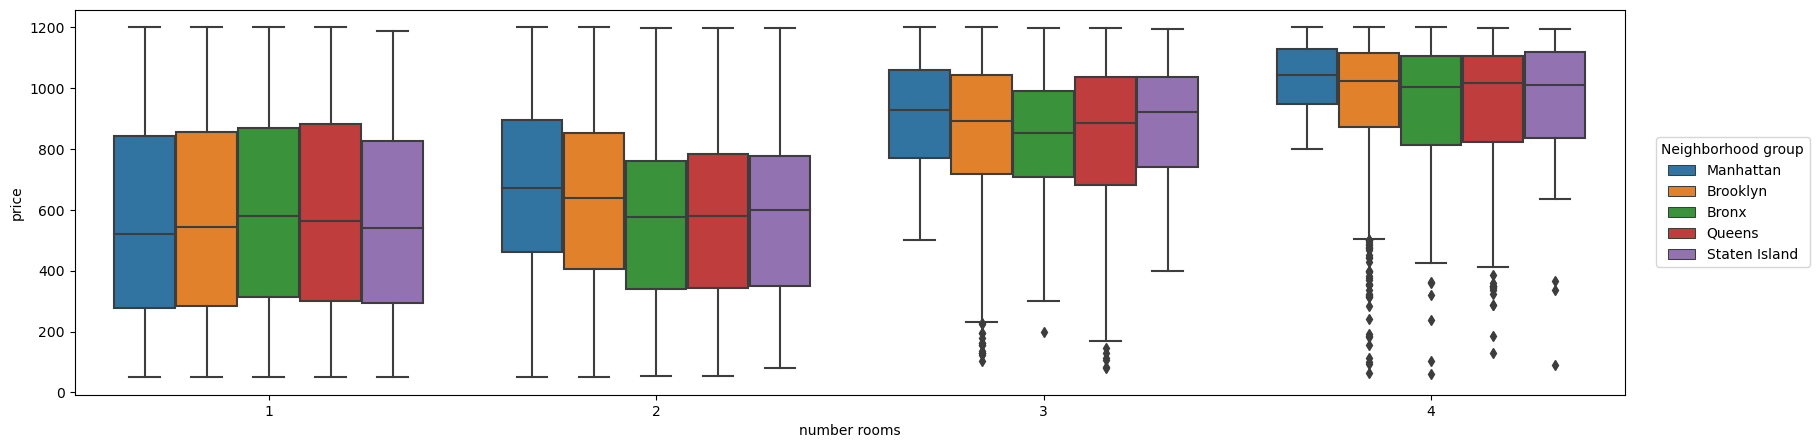

In [34]:

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='number rooms',y='price',hue='room type')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='Types of rooms')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='number rooms',y='price',hue='construction year')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='Construction year')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='number rooms',y='price',hue='cancellation policy')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='Cancellation policy')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='number rooms',y='price',hue='neighborhood group')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='Neighborhood group')
plt.show()



<font color = 'green'>We can consider the feature pairs `number rooms` and `neighbourhood group` for price prediction as the boxplots show pattern.</font>

<font color = 'green'>We do not consider other combinations since they do not show any relationship with each other.</font>

#### Multivariate Analysis for Construction Year

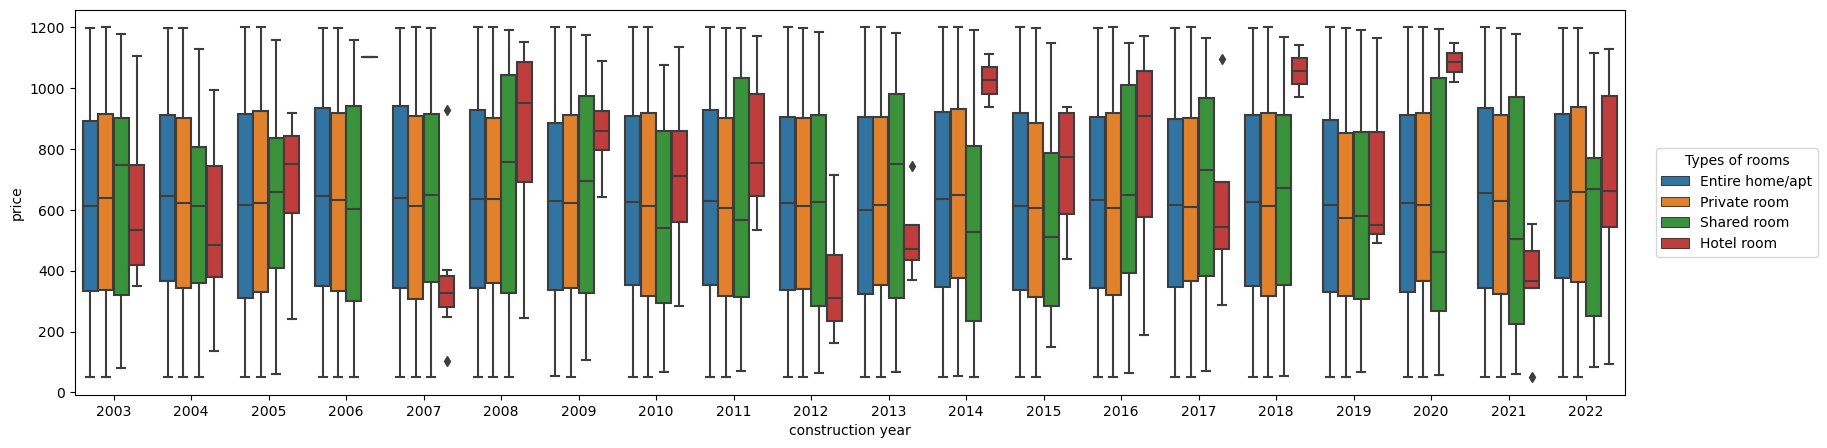

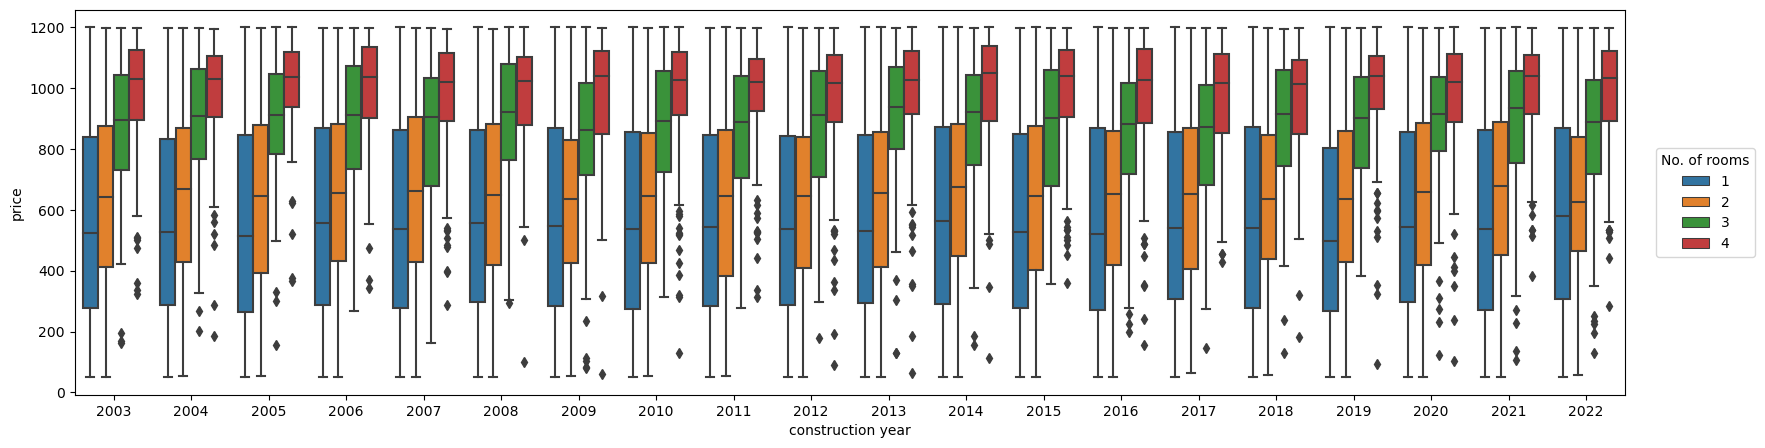

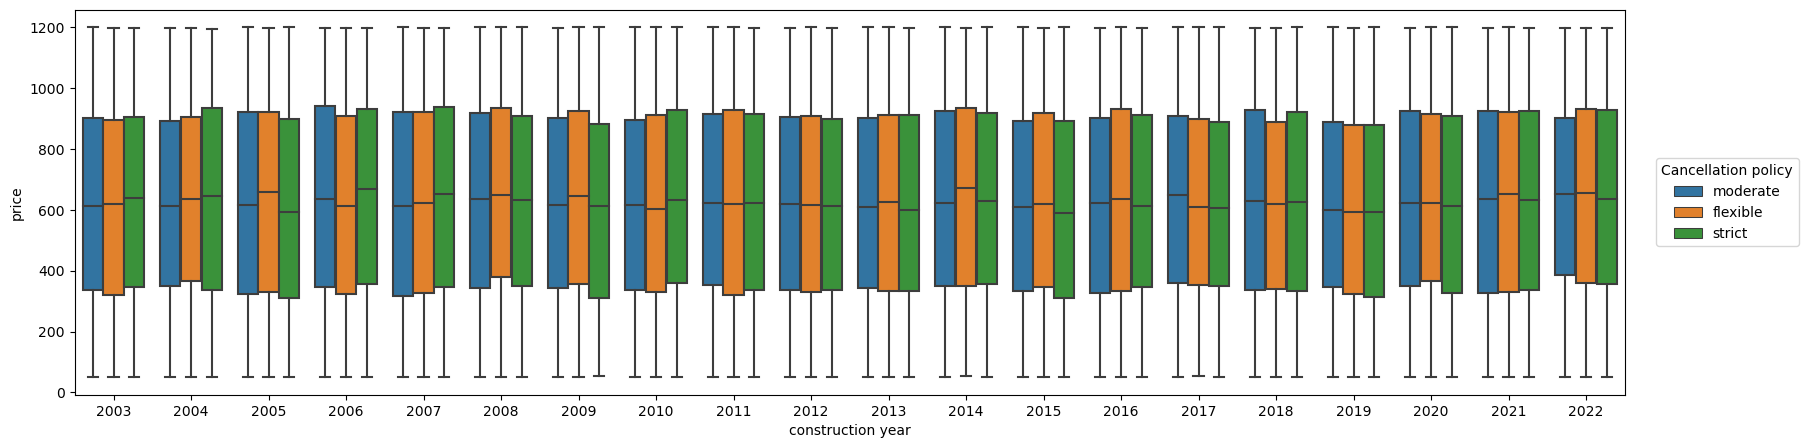

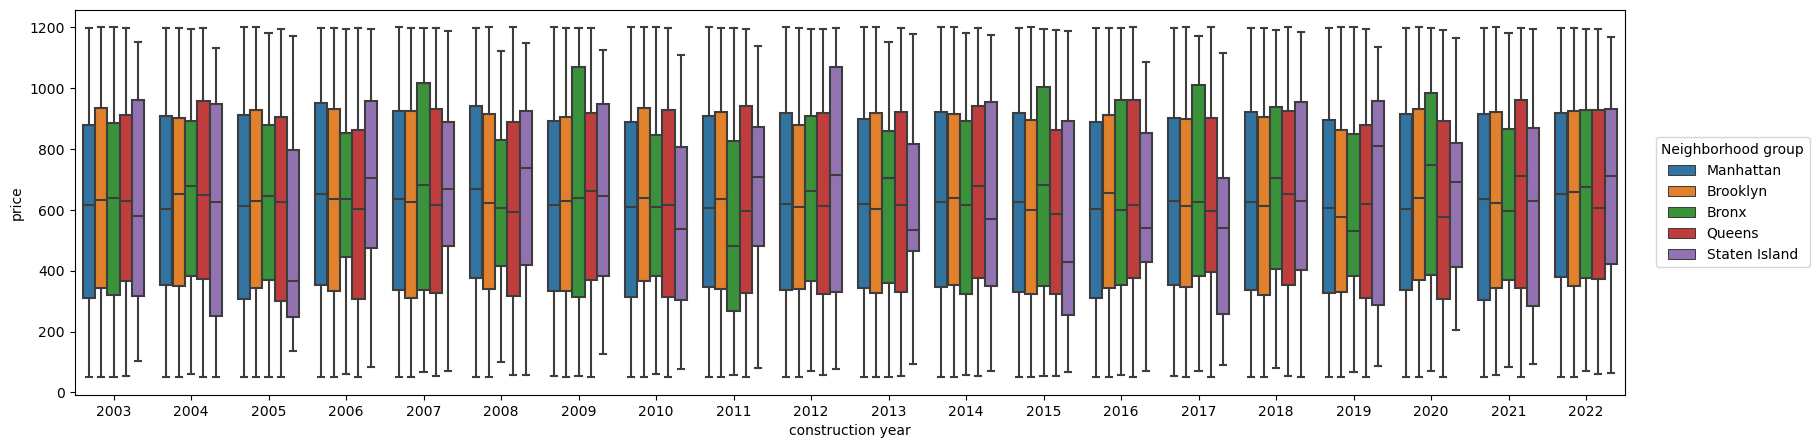

In [35]:

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='construction year',y='price',hue='room type')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='Types of rooms')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='construction year',y='price',hue='number rooms')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='No. of rooms')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='construction year',y='price',hue='cancellation policy')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='Cancellation policy')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(data=df_cleaned_subset,x='construction year',y='price',hue='neighborhood group')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='Neighborhood group')
plt.show()




<font color = 'green'>We can consider the feature pairs `construction year` and `type of rooms` for price prediction as the boxplots show pattern.</font>

<font color = 'green'>We do not consider other combinations since they do not show any relationship with each other.</font>

### Selection of Variables 



<font color = 'green'>From the analysis done above, we concluded following pair.<br>
`Construction Year` - `Room type`<br>
`Number of Rooms` - `Neighborhood Group`<br>
`Room type` - `Neighborhood Group`<br>
`Neighborhood Group` - `Number of Room`<br>
`Neighborhood Group` - `Room type`</font>

<font color = 'green'>So from above pairs we can observe that `Number of Rooms`, `Neighborhood Group` and `Room Type` are good combination of features for predicting price.</font>


## Setting the Price 

## Baseline

In [20]:

df_cleaned.head()
df_cleaned_subset = df_cleaned[["id", "neighborhood group", "number rooms", "room type", "price"]].copy()
df_cleaned_subset.head()

x = df_cleaned_subset.iloc[:,0:4].values
y = df_cleaned_subset.iloc[:,4].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=100)

baseline_price = y_train.mean()
baseline_price

625.2805539458238

<font color='green'> The baseline price for our apartment is 625.28.</font>

In [21]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train, y_train)

y_pred = dummy_regr.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print('The baseline MAE is:', mae)

The baseline MAE is: 284.5633400808907


## Decision Tree

Using a decision tree, we have tried to price your apartment according to similar apartments. 

To use decision trees, we need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600]. 

In [22]:
Price_Bins = []
for i in df_cleaned_subset["price"]:
    if (i>=50 and i<=200):
        Price_Bins.append("[50,200]")
    elif (i>200 and i<=400):
        Price_Bins.append("(200,400]")
    elif (i>400 and i<=600):
        Price_Bins.append("(400,600]")
    elif (i>600 and i<=800):
        Price_Bins.append("(600,800]")
    elif (i>800 and i<=1000):
        Price_Bins.append("(800,1000]")
    else:
        Price_Bins.append("(1000,1200]")

df_cleaned_subset["Price_Bins"] = Price_Bins

In [23]:

x = df_cleaned_subset.iloc[:,1:4].values
y = df_cleaned_subset.iloc[:,5].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 100)

  neighborhood group number rooms        room type  Price_Bins
0          Manhattan            2  Entire home/apt  (800,1000]
1          Manhattan            1     Private room   (600,800]
2          Manhattan            1  Entire home/apt   (400,600]
3          Manhattan            1     Private room    [50,200]
4           Brooklyn            2  Entire home/apt   (400,600]


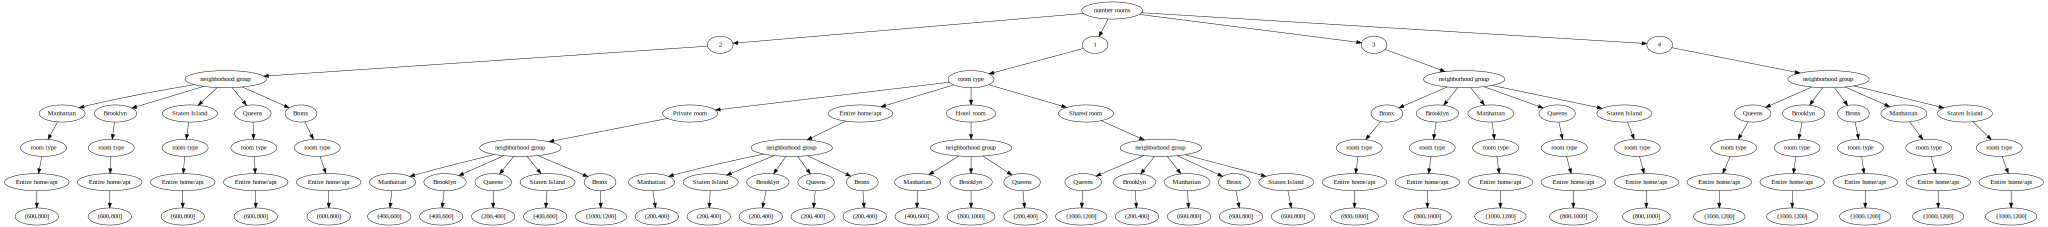

System entropy:  2.577072828540696


In [24]:
# Generating decision tree 
data = pd.concat([pd.DataFrame(x_train), pd.DataFrame(y_train)], axis =1)
data.columns = ["neighborhood group", "number rooms", "room type", "Price_Bins"]
print(data.head())

features = data.columns[:-1]
label = data.columns[-1]
for column in data.columns:
    data[column]= data[column].astype(str)

data_descriptive = data[features].values
data_label = data[label].values

decisionTree = DecisionTree(data_descriptive.tolist(), features.tolist(), data_label.tolist(), "entropy")
model = decisionTree.id3(0,10)

dot = decisionTree.print_visualTree( render=True )
display( dot )

print("System entropy: ", format(decisionTree.entropy))

Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.


<font color='green'>Since our apartment is a 2-room apartment in Manhattan it will fall under the price range (600,800] with mean value 700. </font>

In [25]:

# Our apartment is 2 room apartment in Manhattan, so: 700

decisionTree_price = 700

In [26]:
def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, graph, root)
    return id_label_dict

def get_predictor(tree):
  id_label_dict = get_name_value_dict(tree)
  dotplus = pydotplus.graph_from_dot_data(tree.source)
  G = networkx.nx_pydot.from_pydot(dotplus)
  root = [n for n,d in G.in_degree() if d==0][0]
  paths = []
  for node in G:
      if G.out_degree(node)==0: #it's a leaf
          paths.append(networkx.shortest_path(G, root, node))
  new_paths = []
  for path in paths:
      for name, value in id_label_dict.items():
          path = ([p.replace(name, value) for p in path])
      new_paths.append(path)
  predictor = {}
  for path in new_paths.copy():
    target = path[-1]
    classification = tuple(path[:-1])
    predictor[classification] = target
  return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features
            
def get_predicted_bin(instance, features, predictor):
  feature_values = {}
  for feature in features:
      feature_values[feature] = instance[feature]
  possible_paths = predictor.keys()
  i=0
  while i<2*len(feature_values):
    attribute = [path[i] for path in possible_paths][0]
    if attribute in predictor.values():
      break
    feature_value = feature_values[attribute]
    candidates = []
    for el in possible_paths:
      if str(el[i+1]) == str(feature_value):
        candidates.append(el)
    possible_paths = candidates.copy()
    i+=2
  return predictor[possible_paths[0]]



### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)

In [27]:
# Your answer goes here
y_pred =[]
test_data= pd.DataFrame(x_test)
test_data.columns = ["neighborhood group", "number rooms", "room type"]

for i in range (len(test_data)):
    y_pred.append(get_predicted_bin(test_data.iloc[i,:], features, predictor))


In [28]:
def bin_values(bin_range):
    if (bin_range == "[50,200]"):
        return 125
    elif (bin_range == "(200,400]"):
        return 300
    elif (bin_range == "(400,600]"):
        return 500
    elif (bin_range == "(600,800]"):
        return 700
    elif (bin_range == "(800,1000]"):
        return 900
    else:
        return 1100
    
y_pred = list(map(bin_values, y_pred))
y_test = list(map(bin_values, y_test))

In [29]:

# MAE

mae= mean_absolute_error(y_test, y_pred)
print("MAE for Decision Tree is {}".format(mae))

MAE for Decision Tree is 269.418571831781


## Clustering 

### Encoding

K-means tries to calculate the distance between different data points. Since some of the features we want to use are not numeric, we will apply one-hot encoding to be able to use distance measures. 

In [30]:

catg_data = df_cleaned_subset[["neighborhood group", "room type"]]
data_other_cols = df_cleaned_subset[["number rooms", "price"]]


ohe = OneHotEncoder(categories="auto")
column = catg_data.columns

array_hot_encoded = ohe.fit_transform(catg_data).toarray()
data_hot_encoded = pd.DataFrame(array_hot_encoded, columns=ohe.get_feature_names(column))
 
kmeans_data = pd.concat([data_hot_encoded, data_other_cols], axis=1)

kmeans_data.head()

C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,neighborhood group_Bronx,neighborhood group_Brooklyn,neighborhood group_Manhattan,neighborhood group_Queens,neighborhood group_Staten Island,room type_Entire home/apt,room type_Hotel room,room type_Private room,room type_Shared room,number rooms,price
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,142
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,620
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,368
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,204
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,71


### Choosing number of clusters 

We cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since we are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering. we:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.



In [31]:

x_train, x_test, y_train, y_test = train_test_split(kmeans_data[kmeans_data.columns[0:-1]], kmeans_data[['price']], test_size=0.05, random_state=100)

x_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

In [32]:
means = [[]]
cluster = []
clustering_iter = []
mean_price=[]
price=[]
sil=[[]]
k=0
for i in range (4,16):
    kmeans = KMeans(n_clusters=i, random_state=100, n_init=100).fit(x_train)
    label=kmeans.labels_
    sil[k].append(silhouette_score(x_train, label, metric = 'euclidean'))
    k+=1
    sil.append([])
    for j in range(0,i):
        for x in range(0,len(label)):
            if(label[x]==j):
                cluster.append(j)
                clustering_iter.append(i)
                price.append(y_train.loc[x])
                

In [33]:
price_df = pd.DataFrame(price).reset_index(drop=True)

In [34]:
price_df.head()

,price
0,411
1,747
2,583
3,153
4,376


In [35]:
kmeans_result = pd.concat([pd.DataFrame(cluster), pd.DataFrame(clustering_iter), price_df], axis=1)
kmeans_result.columns=["Cluster group", "No. of Clusters", "Price"]
kmeans_result.head(-50)

,Cluster group,No. of Clusters,Price
0,0,4,411
1,0,4,747
2,0,4,583
3,0,4,153
4,0,4,376
...,...,...,...
807533,14,15,404
807534,14,15,566
807535,14,15,198
807536,14,15,793


In [36]:
mean_prices =pd.DataFrame(kmeans_result.groupby(["No. of Clusters","Cluster group"])['Price'].mean())
mean_prices.reset_index(inplace=True)
mean_prices.columns = ["No. of Clusters", "Cluster group", "Mean prices"]
mean_prices.head(10)

,No. of Clusters,Cluster group,Mean prices
0,4,0,531.822406
1,4,1,623.636103
2,4,2,570.443453
3,4,3,915.149948
4,5,0,529.456488
5,5,1,624.344316
6,5,2,915.149948
7,5,3,621.689884
8,5,4,568.483873
9,6,0,630.919695


<font color='green'>The mean price for each of the resulting clusters is shown in the above dataframe. </font>

In [37]:
std_prices =pd.DataFrame(kmeans_result.groupby(["No. of Clusters","Cluster group"])['Price'].std())
std_prices.reset_index(inplace=True)
std_prices.columns = ["No. of Clusters", "Cluster group", "Standard deviation"]
std_prices.head(10)

,No. of Clusters,Cluster group,Standard deviation
0,4,0,310.494449
1,4,1,331.377515
2,4,2,320.012888
3,4,3,209.153050
4,5,0,309.072074
5,5,1,332.484024
6,5,2,209.153050
7,5,3,330.502344
8,5,4,319.204278
9,6,0,331.826893


<font color='green'>The Standard Deviation for each cluster in each clustering iteration is shown in the above dataframe.  </font>

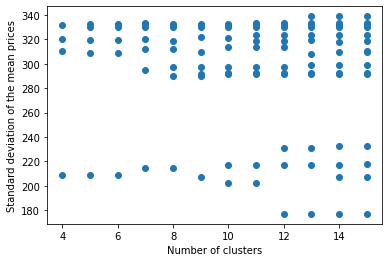

In [38]:
plt.scatter(std_prices["No. of Clusters"], std_prices["Standard deviation"])
plt.xlabel('Number of clusters')
plt.ylabel('Standard deviation of the mean prices')
plt.show()

In [39]:
std_cluster_prices =pd.DataFrame(mean_prices.groupby(["No. of Clusters"])['Mean prices'].std())
std_cluster_prices.reset_index(inplace=True)
std_cluster_prices.columns = ["No. of Clusters", "Standard deviation"]
print(std_cluster_prices)

    No. of Clusters  Standard deviation
0                 4          174.043503
1                 5          152.416483
2                 6          136.805351
3                 7          136.308882
4                 8          138.266443
5                 9          146.639548
6                10          155.506164
7                11          148.340228
8                12          161.059716
9                13          155.150480
10               14          165.791880
11               15          161.794176


<font color='green'>The Standard Deviation for each clustering iteration is shown in the above dataframe.  </font>

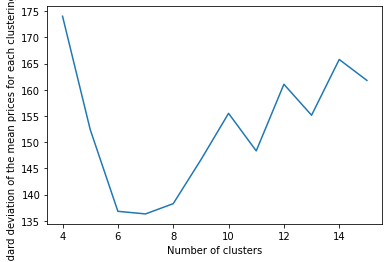

In [40]:
plt.plot(std_cluster_prices["No. of Clusters"], std_cluster_prices["Standard deviation"])
plt.xlabel('Number of clusters')
plt.ylabel('Standard deviation of the mean prices for each clustering Iteration')
plt.show()

In [41]:
print('Silhouette score : ',sil)

Silhouette score :  [[0.4767869336578973], [0.5720084869692488], [0.6655486638218993], [0.7053734962882904], [0.7533362944612065], [0.7836013162892048], [0.8139350729030367], [0.8439362847867965], [0.864757021886349], [0.8878763360601815], [0.9003141174139253], [0.9179524242757059], []]


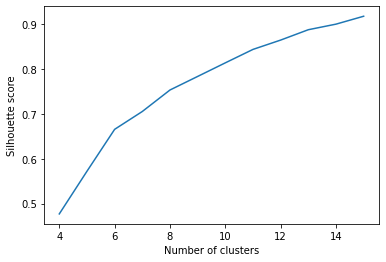

In [42]:
#Plotting the graph for silhouette score
plt.plot(std_cluster_prices["No. of Clusters"], sil[:12] )
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

_Answer:_

<font color='green'>We choose the optimal number of clusters by maximizing the Standard Deviations so that the clusters are well separated from one another. <br>
According to the graph above when number of cluster = 4, Standard Deviation is maximum but for this case we will have less number of classes so we will take the next maximum Standard Deviation i.e when number of cluster = 14. <br> And as seen in the above graph silhouette score is maximum for 14.</font>

### Pricing our apartment 

To predict the price for our apartment, we calculate in which cluster our apartment would be and use the mean value of the cluster as a possible price.

In [43]:

# cluster for 9 clusters
means = [[]]
cluster = []
clustering_iter = []
mean_price=[]
price=[]
j=0

kmeans = KMeans(n_clusters=9, random_state=100, n_init=100).fit(x_train)
label=kmeans.labels_
    
for j in range(0,9):
    for x in range(0,len(label)):
        if(label[x]==j):
            cluster.append(j)
            price.append(y_train.loc[x])
price_df = pd.DataFrame(price).reset_index(drop=True)  

In [44]:
kmeans_result = pd.concat([pd.DataFrame(cluster), price_df], axis=1)
kmeans_result.columns=["Cluster group", "Price"]
kmeans_result =pd.DataFrame(kmeans_result.groupby(["Cluster group"])['Price'].mean())
kmeans_result.reset_index(inplace=True)
kmeans_result.columns = [ "Cluster group", "Mean prices"]
print(kmeans_result)

   Cluster group  Mean prices
0              0   718.877100
1              1   621.689884
2              2   507.925976
3              3   710.408656
4              4   619.776071
5              5   947.092441
6              6   630.919695
7              7   471.881818
8              8   498.120504


In [45]:
x_train.head()

,neighborhood group_Bronx,neighborhood group_Brooklyn,neighborhood group_Manhattan,neighborhood group_Queens,neighborhood group_Staten Island,room type_Entire home/apt,room type_Hotel room,room type_Private room,room type_Shared room,number rooms
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2


In [46]:
x_pred = ohe.transform([['Manhattan', 'Entire home/apt']]).toarray()
x_pred = pd.DataFrame(x_pred, columns = x_train.columns[0:-1])
x_pred['number rooms'] = 2

x_pred
kmeans_price = int(kmeans.predict(x_pred))
cluster_price = kmeans_result.at[kmeans_price,"Mean prices"]
print("Our apartment falls under cluster {} with the mean price {}" .format(kmeans_price, cluster_price))

Our apartment falls under cluster 0 with the mean price 718.8770999115827


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


### Evaluating clustering



In [47]:
dataset = df_cleaned_subset[['number rooms', 'neighborhood group', 'room type', 'price']]

x_train, x_test, y_train, y_test = train_test_split(dataset[dataset.columns[0:-1]], dataset[['price']], test_size=0.05, random_state=100)

#boxplot of mean prices of each cluster

In [66]:
import umap.umap_ as umap

#Preprocessing numerical
full_data = x_train # use the train dataset here
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = sklearn.preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]

In [67]:
dimension1 = pd.DataFrame(dimension1)
dimension2 = pd.DataFrame(dimension2)

In [68]:

train_data =pd.concat([dimension1, dimension2], axis =1)
train_data.columns= ["dimension1", "dimension2"]
train_data.head()

,dimension1,dimension2
0,8.894129,9.970914
1,17.125523,0.664839
2,9.379990,11.211709
3,17.664917,0.528128
4,5.259105,-6.564704


In [69]:
kmeans_for_plot = KMeans(n_clusters=9, random_state=100, n_init=100).fit(train_data)
label=kmeans_for_plot.labels_

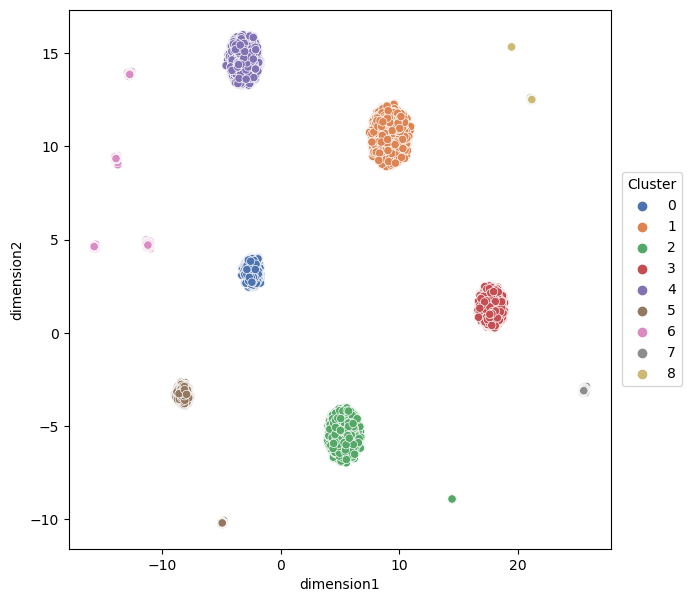

In [70]:
plt.figure(figsize=(7,7))
sns.scatterplot(data =train_data, x="dimension1", y="dimension2", hue = label, legend="full", palette = "deep")
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0, title='Cluster')

plt.show()

_Answer:_

<font color='green'>As can be seen from the graph above, the Clustering Technique does not completely group similar apartments together. There are some outliers in Cluster No. 2, while Cluster Nos. 6, 7, and 8 are also sparse. We can conclude that the dataset's non-uniformity is what led to this predicament. The multivariate graphs created in Question 1 above likewise exhibit the same non-uniformity. </font>

In [48]:

x_train, x_test, y_train, y_test = train_test_split(kmeans_data[kmeans_data.columns[0:-1]], kmeans_data[['price']], test_size=0.05, random_state=100)

x_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
test_result = kmeans.predict(x_test)
y_pred = []
i=0
for i in range(len(test_result)):
    y_pred.append(kmeans_result.at[test_result[i],"Mean prices"])
                                   

In [49]:
mae_kmeans= mean_absolute_error(y_test, y_pred)
print("MAE for K-Means Clustering is",mae_kmeans)

MAE for K-Means Clustering is 261.5067177002751


## Final comments on the price prediction



<font color='green'>

In order to determine a threshold for our price prediction models, we first used the baseline approach. We achieved the MAE of 284.56 by using the average training data price as the baseline price for our unit. We can now utilize this information to assess how effectively our models are working. Instead of determining the actual price, the baseline approach doesn't involve any complex modeling and acts as a benchmark to compare the accuracy of more complex models.

Next we have used Decision Tree model, for which we have converted the prices(target feature) into bins in order to reduce the size of nodes, computation time and cost. Because we compute the anticipated price as the average value of the resulting bin, this method results in significant approximation, making the prediction less accurate. It's also crucial to note that the dataset's entropy score, 2.57, is rather high and indicates that the classes have not been adequately separated. However the MAE of 269.41 is still superior to our baseline model.

Lastly, we have used k means clustering which requires some data pre-processing as it does not accept categorical values.The silhouette score and standard deviations conflict for some choices of k, therefore we are unsure of how many clusters to choose. The standard deviations for each cluster within an iteration are also fairly high, falling between 200 and 340. Additionally, clustering assumes that each cluster has an equal size, but this doesn't stand true for our dataset as it is quite unbalanced. Our clustering results in an MAE of 261.32, which is marginally better than decision trees but still not the best model for determining the prices.
</font>




## Investigating Price Elasticity (32 Points)

Since the number of bookings is not independent of the price. Therefore, we can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for our apartment might decrease. 

We will use the utilization values ontained in the dataset **AirBnB_utilization.csv** for investigating price elasticity.

In [3]:

utilization_data = pd.read_csv('AirBnB_utilization.csv')

In [5]:
utilization_data.head()

,id,number rooms,room type,neighborhood group,price,utilization
0,1002102,1,Entire home/apt,Manhattan,142,305.263673
1,1002403,1,Private room,Manhattan,620,86.294663
2,1002755,2,Entire home/apt,Brooklyn,368,129.287482
3,1003689,1,Entire home/apt,Manhattan,204,206.579601
4,1004650,1,Private room,Brooklyn,71,361.000000


We will investigate the relationship between price and utilization in this subtask. First, we will train different models and choose the one that best predicts utilization for an apartment. Second, we will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that our model provides the correct utilization.

### Learning price elasticity 
We will use different supervised learning techniques including linear regression, SVM, and multilayer perceptrons to predict utilisation. However, we have to first preprocess the data. 

#### Preparing the data set by splitting, one-hot encoding, and normalizing.

In [120]:

# One-hot encoding the categorical columns

catg_data = utilization_data[["neighborhood group", "room type"]]
data_other_cols = utilization_data[["number rooms", "price", "utilization"]]


ohe = OneHotEncoder(categories="auto")
column = catg_data.columns

array_hot_encoded = ohe.fit_transform(catg_data).toarray()
data_hot_encoded = pd.DataFrame(array_hot_encoded, columns=ohe.get_feature_names(column))
 
utilization_data = pd.concat([data_hot_encoded, data_other_cols], axis=1)

C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [121]:
#Splitting the dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(utilization_data[utilization_data.columns[1:-1]], utilization_data[['utilization']], test_size=0.05, random_state=100)

In [122]:
#Normalizing test and train price column

transformer_norm = make_column_transformer(
    (MinMaxScaler(), ['price']),
    remainder='passthrough')

norm = transformer_norm.fit(X_train)
x_train = norm.transform(X_train)
x_test= norm.transform(X_test)

x_train= pd.DataFrame(x_train, columns = transformer_norm.get_feature_names_out())
x_test= pd.DataFrame(x_test,  columns = transformer_norm.get_feature_names_out())

In [123]:
x_train.head()

,minmaxscaler__price,remainder__neighborhood group_Brooklyn,remainder__neighborhood group_Manhattan,remainder__neighborhood group_Queens,remainder__neighborhood group_Staten Island,remainder__room type_Entire home/apt,remainder__room type_Hotel room,remainder__room type_Private room,remainder__room type_Shared room,remainder__number rooms
0,0.727826,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
1,0.513043,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.338261,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.116522,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.313913,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [124]:
#Standardizing test and train price column

transformer = make_column_transformer(
    (StandardScaler(), ['price']),
    remainder='passthrough')

scale = transformer.fit(X_train)
x_train_scale = scale.transform(X_train)
x_test_scale = scale.transform(X_test)

x_train_scale= pd.DataFrame(x_train_scale, columns = transformer.get_feature_names_out())
x_test_scale= pd.DataFrame(x_test_scale,  columns = transformer.get_feature_names_out())

In [125]:
x_train_scale.head()

,standardscaler__price,remainder__neighborhood group_Brooklyn,remainder__neighborhood group_Manhattan,remainder__neighborhood group_Queens,remainder__neighborhood group_Staten Island,remainder__room type_Entire home/apt,remainder__room type_Hotel room,remainder__room type_Private room,remainder__room type_Shared room,remainder__number rooms
0,0.789642,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
1,0.044411,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.562033,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.331402,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.646513,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


For each technique, we use 5-cross-fold validation for hyperparameter optimization and assess the performance on the test set. 

#### Regression

In [126]:

# Linear Regression model using normalized data
lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=folds)
print("R-squared mean score for normalized data :",scores.mean())
y_pred_lr_norm = cross_val_predict(lm, x_test, y_test, cv=folds)

# Linear Regression model using standardized data
scores = cross_val_score(lm, x_train_scale, y_train, scoring='r2', cv=folds)
print("R-squared mean score for standardized data :",scores.mean())
y_pred_lr_std = cross_val_predict(lm, x_test_scale, y_test, cv=folds)


R-squared mean score for normalized data : 0.6593203506460982
R-squared mean score for standardized data : 0.6593206040390968


<font color='green'>Since we are getting same value of R2 score for both normalized and standardized data, we can continue with either of these data. We have considered normnalized data in further models . </font>

In [127]:
#Ridge Regression
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
ridge = Ridge()
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2',cv=5)
grid_result = grid.fit(x_train, y_train)
print('R-squared Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

#Testing the model
model1 = grid.best_estimator_ 
y_pred1 = model1.predict(x_test)
print("Coefficient values: ", model1.coef_)
print("Intercept : ",model1.intercept_)

R-squared Best Score:  0.6594225301848317
Best Params:  {'alpha': 1}
Coefficient values:  [[-215.52640652   40.82140721   48.9217326    36.7009778    -9.97045403
    43.04209171  -28.08989663    8.75015346  -23.70234855    2.56145009]]
Intercept :  [150.34979288]


In [128]:
#Lasso Regression
lasso = Lasso()
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=5)
grid_result = grid.fit(x_train, y_train)
print('R-squared Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

#Testing the model
model2 = grid.best_estimator_ 
y_pred2 = model2.predict(x_test)
print("Coefficient values: ", model2.coef_)
print("Intercept : ",model2.intercept_)

R-squared Best Score:  0.6594224141158325
Best Params:  {'alpha': 0.001}
Coefficient values:  [-215.55559141   40.81099305   48.91050384   36.68800822   -9.90362533
   36.87561874  -33.75476532    2.58433255  -29.83430017    2.56418573]
Intercept :  [156.53526935]


In [129]:
#ElasticNet Regression
elastic_net = ElasticNet()
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', cv = 5)
grid_result = grid.fit(x_train, y_train)
print('R-squared Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

#Testing the model
model3 = grid.best_estimator_ 
y_pred3 = model3.predict(x_test)
print("Coefficient values: ", model3.coef_)
print("Intercept : ",model3.intercept_)

R-squared Best Score:  0.6593670532287812
Best Params:  {'alpha': 0.001}
Coefficient values:  [-214.09497935   38.97912505   47.02886143   34.78696541  -11.20608604
   40.70158007  -21.37822817    6.23636509  -25.58510539    2.35121028]
Intercept :  [154.14598967]


In [130]:

#Calculating Mean absolute error
lasso_mae= mean_absolute_error(y_test, y_pred2)
print("MAE for Lasso Regressor (L1 Regularization) is", lasso_mae)

ridge_mae= mean_absolute_error(y_test, y_pred1)
print("MAE for Ridge Regressor (L2 Regularization) is", ridge_mae)


MAE for Lasso Regressor (L1 Regularization) is 35.387659542356616
MAE for Ridge Regressor (L2 Regularization) is 35.386231222573954


In [131]:
# Predicting utilisation for our apartment using decision tree price
x_pred_tree = x_pred.copy()
x_pred_tree['price'] = decisionTree_price
x_pred_tree

x_pred_tree = norm.transform(x_pred_tree)
x_pred_tree= pd.DataFrame(x_pred_tree, columns = transformer_norm.get_feature_names_out())
decisionTree_util = model1.predict(x_pred_tree)
print("Predicted utilisation for our apartment when price = 700 (Decision Tree prediction)", decisionTree_util)

Predicted utilisation for our apartment when price = 700 (Decision Tree prediction) [[125.61724411]]


In [132]:
# Predicting utilisation for our apartment using clustering price

x_pred_kmeans = x_pred.copy()
x_pred_kmeans['price'] = cluster_price
x_pred_kmeans
# x_pred_kmeans = pd.DataFrame([[x_pred[], kmeans_price]], columns=utilization_data.columns[1:-1])
x_pred_kmeans = norm.transform(x_pred_kmeans)
x_pred_kmeans= pd.DataFrame(x_pred_kmeans, columns = transformer_norm.get_feature_names_out())

kmeans_util = model1.predict(x_pred_kmeans)
print("Predicted utilisation for our apartment when price = 718 (Kmeans CLustering prediction)", kmeans_util)

Predicted utilisation for our apartment when price = 718 (Kmeans CLustering prediction) [[122.07940628]]


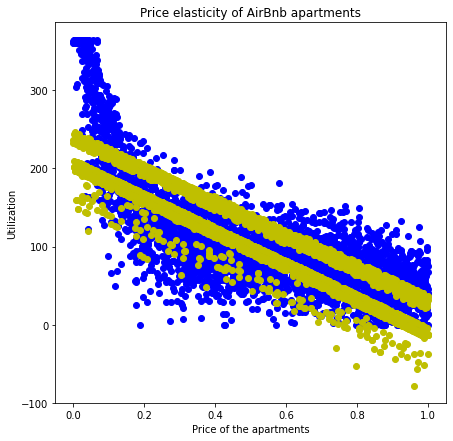

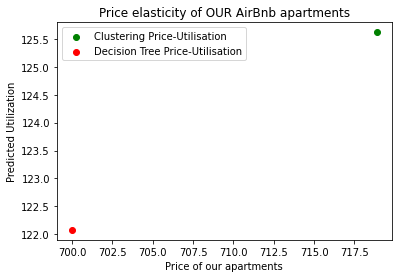

In [133]:
plt.figure(figsize=(7,7))
plt.scatter(x_test["minmaxscaler__price"], y_test, color='b') 
plt.scatter(x_test["minmaxscaler__price"], y_pred1, color = 'y') 
plt.xlabel("Price of the apartments")
plt.ylabel("Utilization")
plt.title("Price elasticity of AirBnb apartments")
plt.show()
plt.scatter(cluster_price, decisionTree_util, color = 'g', label = 'Clustering Price-Utilisation')
plt.scatter(decisionTree_price, kmeans_util, color = 'r', label = "Decision Tree Price-Utilisation")
plt.xlabel("Price of our apartments")
plt.ylabel("Predicted Utilization")
plt.title("Price elasticity of OUR AirBnb apartments")
plt.legend()
plt.show()


#### Linear SVR 

In [66]:

parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000], "loss" : ["epsilon_insensitive","squared_epsilon_insensitive"]}
param_grid = parameters
lsvr = LinearSVR()
grid = GridSearchCV(estimator=lsvr, param_grid=parameters, scoring='r2',cv=5)
grid_result = grid.fit(x_train, y_train)
print('R-squared Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

#Testing the model
model_svr = grid.best_estimator_ 
y_pred_svr = model_svr.predict(x_test)
print("Coefficient values: ", model_svr.coef_)
print("Intercept : ",model_svr.intercept_)

C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was 

C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was 

C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\Anaconda\envs\env-IDS2022-23

R-squared Best Score:  0.659422455875357
Best Params:  {'C': 1, 'loss': 'squared_epsilon_insensitive'}
Coefficient values:  [-215.54415347   40.87769407   48.98415261   36.76161354   -9.91952857
   73.1707122     1.6801841    38.88723485    6.4159915     2.57110118]
Intercept :  [120.15412265]


In [67]:

svr_mae = mean_absolute_error(y_test, y_pred_svr)
print("MAE for SVR is", svr_mae)

MAE for SVR is 35.38719919925359


In [68]:

#predicting the utilisation for our apartment using price predicted by kmeans clustering model

decisionTree_util = model_svr.predict(x_pred_tree)
print("Predicted utilisation for our apartment when price = 700 (Decision Tree prediction)", decisionTree_util)

#predicting the utilisation for our apartment using price predicted by kmeans clustering model
kmeans_util = model_svr.predict(x_pred_kmeans)
print("Predicted utilisation for our apartment when price = 718 (Kmeans CLustering prediction)", kmeans_util)

Predicted utilisation for our apartment when price = 700 (Decision Tree prediction) [125.62188569]
Predicted utilisation for our apartment when price = 718 (Kmeans CLustering prediction) [122.08375655]


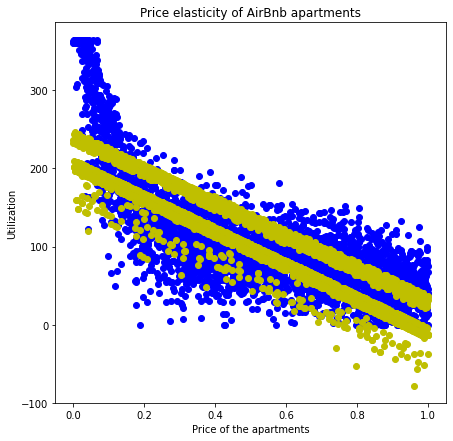

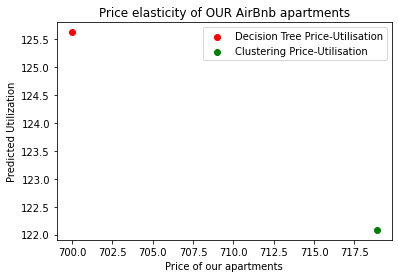

In [69]:
plt.figure(figsize=(7,7))
plt.scatter(x_test["minmaxscaler__price"], y_test, color='b') 
plt.scatter(x_test["minmaxscaler__price"], y_pred_svr, color = 'y') 
plt.xlabel("Price of the apartments")
plt.ylabel("Utilization")
plt.title("Price elasticity of AirBnb apartments")
plt.show()
plt.scatter(decisionTree_price, decisionTree_util, color = 'r', label = 'Decision Tree Price-Utilisation')
plt.scatter(cluster_price, kmeans_util, color = 'g', label = "Clustering Price-Utilisation")
plt.xlabel("Price of our apartments")
plt.ylabel("Predicted Utilization")
plt.title("Price elasticity of OUR AirBnb apartments")
plt.legend()
plt.show()


#### Learning Non-Linear Relationships

#### Kernels in Regression

We are using a transformation of the price and a regression to incorporate non-linear relationships.

In [70]:
x_train_kernel = x_train.copy()
x_test_kernel = x_test.copy()

In [71]:

# Price transformation
poly = PolynomialFeatures(degree=2)
transformed_price = poly.fit_transform(x_train_kernel[['minmaxscaler__price']])
transformed_test_price = poly.fit_transform(x_test_kernel[['minmaxscaler__price']])

print(transformed_price)


[[1.         0.72782609 0.52973081]
 [1.         0.51304348 0.26321361]
 [1.         0.33826087 0.11442042]
 ...
 [1.         0.73565217 0.54118412]
 [1.         0.70347826 0.49488166]
 [1.         0.56782609 0.32242647]]


In [72]:
x_train_kernel["Tranformed_price_x"] = transformed_price[:,1]
x_train_kernel["Tranformed_price_x2"] = transformed_price[:,2]
x_train_kernel.drop(['minmaxscaler__price'], axis =1, inplace=True)
x_train_kernel.head()

,remainder__neighborhood group_Brooklyn,remainder__neighborhood group_Manhattan,remainder__neighborhood group_Queens,remainder__neighborhood group_Staten Island,remainder__room type_Entire home/apt,remainder__room type_Hotel room,remainder__room type_Private room,remainder__room type_Shared room,remainder__number rooms,Tranformed_price_x,Tranformed_price_x2
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.727826,0.529731
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.513043,0.263214
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.338261,0.114420
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.116522,0.013577
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.313913,0.098541


In [73]:
x_test_kernel["Tranformed_price_x"] = transformed_test_price[:,1]
x_test_kernel["Tranformed_price_x2"] = transformed_test_price[:,2]
x_test_kernel.drop(['minmaxscaler__price'], axis =1, inplace=True)
x_test_kernel.head()

,remainder__neighborhood group_Brooklyn,remainder__neighborhood group_Manhattan,remainder__neighborhood group_Queens,remainder__neighborhood group_Staten Island,remainder__room type_Entire home/apt,remainder__room type_Hotel room,remainder__room type_Private room,remainder__room type_Shared room,remainder__number rooms,Tranformed_price_x,Tranformed_price_x2
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.134783,0.018166
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.955652,0.913271
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.217391,0.047259
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.392174,0.153800
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.541739,0.293481


In [81]:
#Ridge Regression using quadratic kernel
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
ridge = Ridge()
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2',cv=5)
grid_result = grid.fit(x_train_kernel, y_train)
print('R-squared Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

#Testing the model
model_ridge_kernel = grid.best_estimator_ 
y_pred1 = model_ridge_kernel.predict(x_test_kernel)
print("Coefficient values: ", model_ridge.coef_)
print("Intercept : ",model_ridge.intercept_)

R-squared Best Score:  0.7979935496995171
Best Params:  {'alpha': 0.01}
Coefficient values:  [[  39.56163602   47.30192678   35.05991791   -9.52332358   44.28270847
   -27.2213143     8.48183078  -25.54322525    0.80459092 -618.2621006
   403.42279176]]
Intercept :  [220.78628501]


In [75]:
x_train_kernel3 = x_train.copy()
x_test_kernel3 = x_test.copy()

poly = PolynomialFeatures(degree=3)
transformed_price = poly.fit_transform(x_train_kernel3[['minmaxscaler__price']])
transformed_test_price = poly.fit_transform(x_test_kernel3[['minmaxscaler__price']])

print(transformed_price)
x_train_kernel3["Tranformed_price_x"] = transformed_price[:,1]
x_train_kernel3["Tranformed_price_x2"] = transformed_price[:,2]
x_train_kernel3.drop(['minmaxscaler__price'], axis =1, inplace=True)

x_test_kernel3["Tranformed_price_x"] = transformed_test_price[:,1]
x_test_kernel3["Tranformed_price_x2"] = transformed_test_price[:,2]
x_test_kernel3.drop(['minmaxscaler__price'], axis =1, inplace=True)


[[1.         0.72782609 0.52973081 0.3855519 ]
 [1.         0.51304348 0.26321361 0.13504003]
 [1.         0.33826087 0.11442042 0.03870395]
 ...
 [1.         0.73565217 0.54118412 0.39812328]
 [1.         0.70347826 0.49488166 0.34813849]
 [1.         0.56782609 0.32242647 0.18308216]]


In [77]:
#Ridge Regression using cubic kernel
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
ridge = Ridge()
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2',cv=5)
grid_result = grid.fit(x_train_kernel, y_train)
print('R-squared Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

#Testing the model
model_ridge = grid.best_estimator_ 
y_pred2 = model_ridge.predict(x_test_kernel)
print("Coefficient values: ", model_ridge.coef_)
print("Intercept : ",model_ridge.intercept_)

R-squared Best Score:  0.7979935496995171
Best Params:  {'alpha': 0.01}
Coefficient values:  [[  39.56163602   47.30192678   35.05991791   -9.52332358   44.28270847
   -27.2213143     8.48183078  -25.54322525    0.80459092 -618.2621006
   403.42279176]]
Intercept :  [220.78628501]


In [79]:

#Calculating Mean absolute error
ridge_mae_kernel2= mean_absolute_error(y_test, y_pred1)
print("MAE for Ridge Regressor (L2 Regularization) using quadratic kernel is", ridge_mae_kernel2)

ridge_mae_kernel3= mean_absolute_error(y_test, y_pred2)
print("MAE for Ridge Regressor (L2 Regularization) using cubic kernel", ridge_mae_kernel3)


MAE for Ridge Regressor (L2 Regularization) using quadratic kernel is 28.522350052801624
MAE for Ridge Regressor (L2 Regularization) using cubic kernel 28.522350052801624


In [88]:

#predicting the utilisation for our apartment using price predicted by kmeans clustering model
x_pred_tree_kernel = x_pred_tree.copy()
x_pred_kmeans_kernel = x_pred_kmeans.copy()

poly = PolynomialFeatures(degree=2)
transformed_tree_price = poly.fit_transform(x_pred_tree_kernel[['minmaxscaler__price']])
transformed_kmeans_price = poly.fit_transform(x_pred_kmeans_kernel[['minmaxscaler__price']])


x_pred_tree_kernel["Tranformed_price_x"] = transformed_tree_price[:,1]
x_pred_tree_kernel["Tranformed_price_x2"] = transformed_tree_price[:,2]
x_pred_tree_kernel.drop(['minmaxscaler__price'], axis =1, inplace=True)
x_pred_tree_kernel.head()
x_pred_kmeans_kernel["Tranformed_price_x"] = transformed_kmeans_price[:,1]
x_pred_kmeans_kernel["Tranformed_price_x2"] = transformed_kmeans_price[:,2]
x_pred_kmeans_kernel.drop(['minmaxscaler__price'], axis =1, inplace=True)
x_pred_kmeans_kernel.head()

decisionTree_util_kernel1 = model_ridge_kernel.predict(x_pred_tree_kernel)
print("Predicted utilisation for our apartment when price = 700 (Decision Tree prediction)", decisionTree_util_kernel1)

#predicting the utilisation for our apartment using price predicted by kmeans clustering model
kmeans_util_kernel2 = model_ridge_kernel.predict(x_pred_kmeans_kernel)
print("Predicted utilisation for our apartment when price = 718 (Kmeans CLustering prediction)", kmeans_util_kernel2)

Predicted utilisation for our apartment when price = 700 (Decision Tree prediction) [[93.4093719]]
Predicted utilisation for our apartment when price = 718 (Kmeans CLustering prediction) [[90.85527053]]


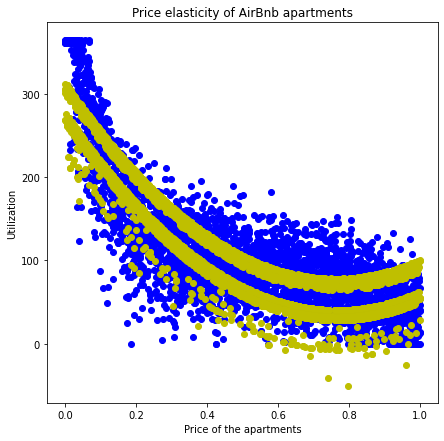

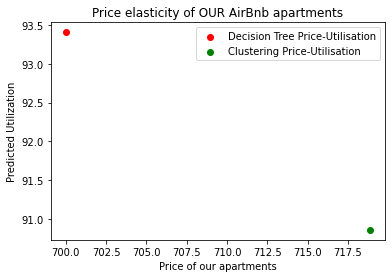

In [89]:

plt.figure(figsize=(7,7))
plt.scatter(x_test["minmaxscaler__price"], y_test, color='b') 
plt.scatter(x_test["minmaxscaler__price"], y_pred1, color = 'y') 
plt.xlabel("Price of the apartments")
plt.ylabel("Utilization")
plt.title("Price elasticity of AirBnb apartments")
plt.show()
plt.scatter(decisionTree_price, decisionTree_util_kernel1, color = 'r', label = 'Decision Tree Price-Utilisation')
plt.scatter(cluster_price, kmeans_util_kernel2, color = 'g', label = "Clustering Price-Utilisation")
plt.xlabel("Price of our apartments")
plt.ylabel("Predicted Utilization")
plt.title("Price elasticity of OUR AirBnb apartments")
plt.legend()
plt.show()

#### Kernels in SVR 

In [90]:

param = {'kernel' : ['poly'],'C' : [1,5,10],'degree' : [3,8],'gamma' : ('auto','scale')}
model_svr = SVR()
grid = GridSearchCV(estimator=model_svr, param_grid=param, scoring='r2', cv = 5, n_jobs = -1, verbose =2)
grid_result = grid.fit(x_train.sample(25000, random_state = 100), y_train.sample(25000, random_state = 100))
print('R-squared score of polynomial kernel: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared score of polynomial kernel:  0.705254739141335
Best Params:  {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [91]:

#Testing the model
model_polysvr = grid.best_estimator_
y_pred_polykernel = model_polysvr.predict(x_test)

In [92]:
param = {'kernel' : ['rbf'],'C' : [1,5,10],'gamma' : ('auto','scale')}
model_svr = SVR()
grid = GridSearchCV(estimator=model_svr, param_grid=param, scoring='r2', cv = 5, n_jobs = -1, verbose =2)
grid_result = grid.fit(x_train.sample(25000, random_state = 100), y_train.sample(25000, random_state = 100))
print('R-squared score rbf kernel: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared score rbf kernel:  0.7434304165214594
Best Params:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [93]:

#Testing the model
model_rbfsvr = grid.best_estimator_
y_pred_rbfkernel = model_rbfsvr.predict(x_test)

In [94]:
param = {'kernel' : ['sigmoid'],'C' : [1,5,10],'gamma' : ('auto','scale')}
model_svr = SVR()
grid = GridSearchCV(estimator=model_svr, param_grid=param, scoring='r2', cv = 5, n_jobs = -1, verbose =2)
grid_result = grid.fit(x_train.sample(25000, random_state = 100), y_train.sample(25000, random_state = 100))
print('R-squared score of sigmoid kernel: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared score of sigmoid kernel:  0.43824617287426026
Best Params:  {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}


In [95]:

#Testing the model
model_sigmoidsvr = grid.best_estimator_
y_pred_sigmoidkernel = model_sigmoidsvr.predict(x_test)

In [96]:

kernelsvr_mae = mean_absolute_error(y_test, y_pred_polykernel)
print("MAE for SVR using polynomial kernel is: ", kernelsvr_mae)

kernelsvr_mae = mean_absolute_error(y_test, y_pred_rbfkernel)
print("MAE for SVR using rbf kernel is: ", kernelsvr_mae)

kernelsvr_mae = mean_absolute_error(y_test, y_pred_sigmoidkernel)
print("MAE for SVR using sigmoid kernel is", kernelsvr_mae)

MAE for SVR using polynomial kernel is:  29.464214420547997
MAE for SVR using rbf kernel is:  27.94326834517762
MAE for SVR using sigmoid kernel is 45.41371987951206


In [97]:

#predicting the utilisation for our apartment using price predicted by decision tree model

decisionTree_util_svr1 = model_polysvr.predict(x_pred_tree)
print("Predicted utilisation for our apartment when price = 700 (Decision Tree prediction)", decisionTree_util)

#predicting the utilisation for our apartment using price predicted by kmeans clustering model
kmeans_util_svr1 = model_polysvr.predict(x_pred_kmeans)
print("Predicted utilisation for our apartment when price = 718 (Kmeans CLustering prediction)", kmeans_util)

Predicted utilisation for our apartment when price = 700 (Decision Tree prediction) [125.62188569]
Predicted utilisation for our apartment when price = 718 (Kmeans CLustering prediction) [122.08375655]


In [98]:

#predicting the utilisation for our apartment using price predicted by decision tree model

decisionTree_util_svr2 = model_rbfsvr.predict(x_pred_tree)
print("Predicted utilisation for our apartment when price = 700 (Decision Tree prediction)", decisionTree_util)

#predicting the utilisation for our apartment using price predicted by kmeans clustering model
kmeans_util_svr2 = model_rbfsvr.predict(x_pred_kmeans)
print("Predicted utilisation for our apartment when price = 718 (Kmeans CLustering prediction)", kmeans_util)

Predicted utilisation for our apartment when price = 700 (Decision Tree prediction) [125.62188569]
Predicted utilisation for our apartment when price = 718 (Kmeans CLustering prediction) [122.08375655]


In [99]:

#predicting the utilisation for our apartment using price predicted by decision tree model

decisionTree_util_svr3 = model_sigmoidsvr.predict(x_pred_tree)
print("Predicted utilisation for our apartment when price = 700 (Decision Tree prediction)", decisionTree_util)

#predicting the utilisation for our apartment using price predicted by kmeans clustering model
kmeans_util_svr3 = model_sigmoidsvr.predict(x_pred_kmeans)
print("Predicted utilisation for our apartment when price = 718 (Kmeans CLustering prediction)", kmeans_util)

Predicted utilisation for our apartment when price = 700 (Decision Tree prediction) [125.62188569]
Predicted utilisation for our apartment when price = 718 (Kmeans CLustering prediction) [122.08375655]


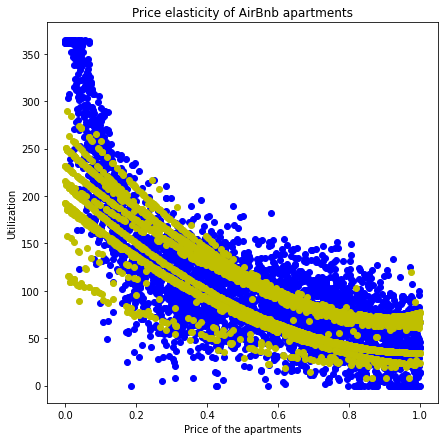

In [100]:
plt.figure(figsize=(7,7))
plt.scatter(x_test["minmaxscaler__price"], y_test, color='b') 
plt.scatter(x_test["minmaxscaler__price"], y_pred_polykernel, color = 'y') 
plt.xlabel("Price of the apartments")
plt.ylabel("Utilization")
plt.title("Price elasticity of AirBnb apartments")
plt.show()

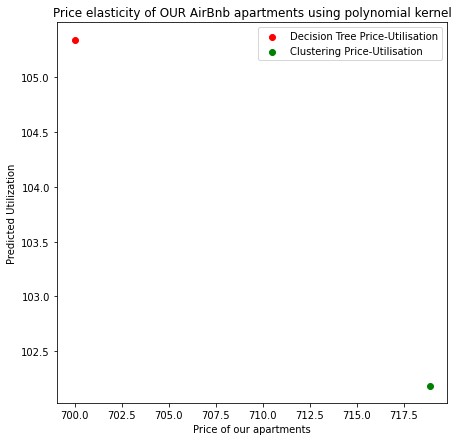

In [105]:
plt.figure(figsize=(7,7))
plt.scatter(decisionTree_price, decisionTree_util_svr1, color = 'r', label = 'Decision Tree Price-Utilisation')
plt.scatter(cluster_price, kmeans_util_svr1, color = 'g', label = "Clustering Price-Utilisation")
plt.xlabel("Price of our apartments")
plt.ylabel("Predicted Utilization")
plt.title("Price elasticity of OUR AirBnb apartments using polynomial kernel")
plt.legend()
plt.show()


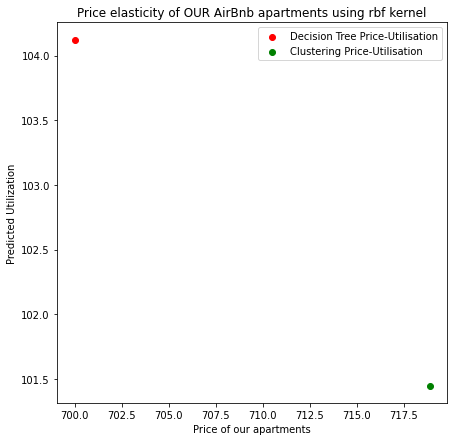

In [104]:
plt.figure(figsize=(7,7))
plt.scatter(decisionTree_price, decisionTree_util_svr2, color = 'r', label = 'Decision Tree Price-Utilisation')
plt.scatter(cluster_price, kmeans_util_svr2, color = 'g', label = "Clustering Price-Utilisation")
plt.xlabel("Price of our apartments")
plt.ylabel("Predicted Utilization")
plt.title("Price elasticity of OUR AirBnb apartments using rbf kernel")
plt.legend()
plt.show()


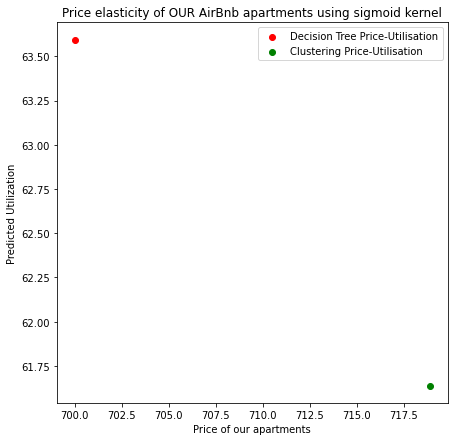

In [106]:
plt.figure(figsize=(7,7))
plt.scatter(decisionTree_price, decisionTree_util_svr3, color = 'r', label = 'Decision Tree Price-Utilisation')
plt.scatter(cluster_price, kmeans_util_svr3, color = 'g', label = "Clustering Price-Utilisation")
plt.xlabel("Price of our apartments")
plt.ylabel("Predicted Utilization")
plt.title("Price elasticity of OUR AirBnb apartments using sigmoid kernel")
plt.legend()
plt.show()


<font color='green'>We use kernels to observe non-linear relationships between descriptive and target features and we acheive a lower MAE as compared to linear models, this shows that tere exists some non-linear relationship between price and utilisation.</font>



#### Neural Network 

In [107]:

estimator=MLPRegressor()


param_grid = {"hidden_layer_sizes": [1,10], "activation": ["identity", "logistic", "tanh", "relu"]}

gsc = GridSearchCV(estimator, param_grid, verbose =2, cv=5)
grid_result = gsc.fit(x_train, y_train)

best_params = grid_result.best_params_
print('Best Parameters : ', best_params)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........activation=identity, hidden_layer_sizes=1; total time=   7.6s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........activation=identity, hidden_layer_sizes=1; total time=   9.9s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........activation=identity, hidden_layer_sizes=1; total time=  10.7s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........activation=identity, hidden_layer_sizes=1; total time=   8.8s
[CV] END ..........activation=identity, hidden_layer_sizes=1; total time=   8.5s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........activation=identity, hidden_layer_sizes=10; total time=   3.6s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........activation=identity, hidden_layer_sizes=10; total time=   5.0s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........activation=identity, hidden_layer_sizes=10; total time=   3.7s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........activation=identity, hidden_layer_sizes=10; total time=   3.2s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........activation=identity, hidden_layer_sizes=10; total time=   4.9s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........activation=logistic, hidden_layer_sizes=1; total time=  12.2s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........activation=logistic, hidden_layer_sizes=1; total time=  11.1s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........activation=logistic, hidden_layer_sizes=1; total time=  11.3s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........activation=logistic, hidden_layer_sizes=1; total time=  11.8s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........activation=logistic, hidden_layer_sizes=1; total time=  11.1s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........activation=logistic, hidden_layer_sizes=10; total time=  21.0s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........activation=logistic, hidden_layer_sizes=10; total time=  22.1s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........activation=logistic, hidden_layer_sizes=10; total time=  22.9s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........activation=logistic, hidden_layer_sizes=10; total time=  19.7s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........activation=logistic, hidden_layer_sizes=10; total time=  20.5s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............activation=tanh, hidden_layer_sizes=1; total time=  11.2s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............activation=tanh, hidden_layer_sizes=1; total time=  10.1s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............activation=tanh, hidden_layer_sizes=1; total time=  10.9s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............activation=tanh, hidden_layer_sizes=1; total time=  11.1s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............activation=tanh, hidden_layer_sizes=1; total time=  10.7s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............activation=tanh, hidden_layer_sizes=10; total time=  14.6s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............activation=tanh, hidden_layer_sizes=10; total time=  15.2s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............activation=tanh, hidden_layer_sizes=10; total time=  15.1s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............activation=tanh, hidden_layer_sizes=10; total time=  11.7s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............activation=tanh, hidden_layer_sizes=10; total time=  15.1s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............activation=relu, hidden_layer_sizes=1; total time=  10.2s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............activation=relu, hidden_layer_sizes=1; total time=  18.7s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............activation=relu, hidden_layer_sizes=1; total time=  10.8s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............activation=relu, hidden_layer_sizes=1; total time=  11.0s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..............activation=relu, hidden_layer_sizes=1; total time=  10.0s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............activation=relu, hidden_layer_sizes=10; total time=  16.4s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............activation=relu, hidden_layer_sizes=10; total time=  25.8s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............activation=relu, hidden_layer_sizes=10; total time=  13.8s
[CV] END .............activation=relu, hidden_layer_sizes=10; total time=  10.6s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .............activation=relu, hidden_layer_sizes=10; total time=   7.2s


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters :  {'activation': 'tanh', 'hidden_layer_sizes': 10}


C:\Users\Public\Anaconda\envs\env-IDS2022-23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [108]:
print('R-squared Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

#Testing the model
model_nn = gsc.best_estimator_ 
y_pred_nn = model_nn.predict(x_test)

R-squared Best Score:  0.913103450171854
Best Params:  {'activation': 'tanh', 'hidden_layer_sizes': 10}


In [109]:
# Your answer goes here
nn_mae = mean_absolute_error(y_test, y_pred_nn)
print("MAE for Neural Networks is", nn_mae)

MAE for Neural Networks is 19.283929259775423


In [110]:
#predicting the utilisation for our apartment using price predicted by Decision Tree model
decisionTree_util_nn = model_nn.predict(x_pred_tree)
print("Predicted utilisation for our apartment when price = 700 (Decision Tree prediction)", decisionTree_util_nn)

#predicting the utilisation for our apartment using price predicted by kmeans clustering model
kmeans_util_nn = model_nn.predict(x_pred_kmeans)
print("Predicted utilisation for our apartment when price = 718 (Kmeans CLustering prediction)", kmeans_util_nn)

Predicted utilisation for our apartment when price = 700 (Decision Tree prediction) [108.30265616]
Predicted utilisation for our apartment when price = 718 (Kmeans CLustering prediction) [106.2041145]


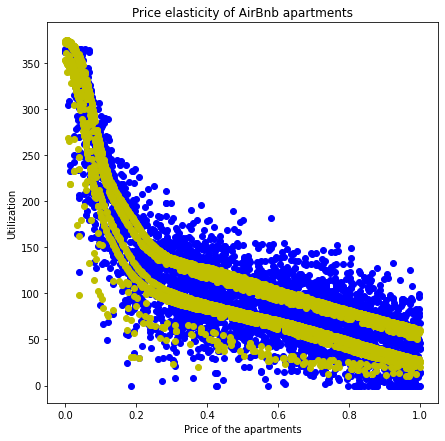

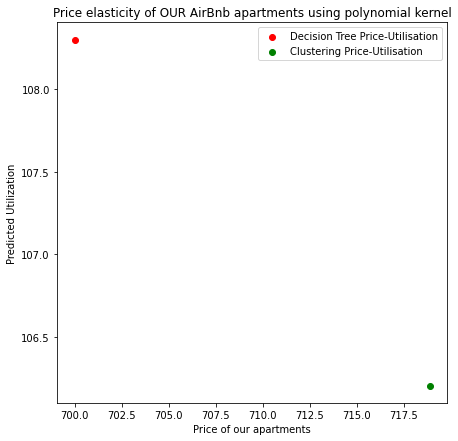

In [112]:
plt.figure(figsize=(7,7))
plt.scatter(x_test["minmaxscaler__price"], y_test, color='b') 
plt.scatter(x_test["minmaxscaler__price"], y_pred_nn, color = 'y') 
plt.xlabel("Price of the apartments")
plt.ylabel("Utilization")
plt.title("Price elasticity of AirBnb apartments")
plt.show()
plt.figure(figsize=(7,7))
plt.scatter(decisionTree_price, decisionTree_util_nn, color = 'r', label = 'Decision Tree Price-Utilisation')
plt.scatter(cluster_price, kmeans_util_nn, color = 'g', label = "Clustering Price-Utilisation")
plt.xlabel("Price of our apartments")
plt.ylabel("Predicted Utilization")
plt.title("Price elasticity of OUR AirBnb apartments using polynomial kernel")
plt.legend()
plt.show()


### Deciding price using best utilisation predicting model

<font color='green'>Neural Networks performs the best with MAE of 19.28. We obtain the utilization as 108.3 for decision tree and 106.2 for k means clustering. Since clustering price (718) > Decision tree price (700), the clustering price seems to be the better price and the total revenue generated (utilization * price) for decision tree is also less than that of  clustering. Thus clustering price is the optimum price as it generates higher revenue. 

</font>

In [116]:

revenue_tree = decisionTree_price*decisionTree_util_nn
revenue_clustering = cluster_price * kmeans_util_nn

print("Revenue generated for decision tree price = ", revenue_tree)
print("Revenue generated for clustering price = ", revenue_clustering)
       

Revenue generated for decision tree price =  [75811.85931255]
Revenue generated for clustering price =  [76347.70582986]


#  Conclusion 

<font color='green'> During preprocessing of our dataset, we discovered 1477 missing variables and 389 duplicate values. We did some exploratory data analysis and cleaned the data. We used graphical analysis to determine the relationships between several descriptive features and the target feature(price) in order to select the features for predicting the price.
Then, in order to compare the decision tree and clustering model, we defined a baseline pricing. For the decision tree model, we had to first divide the price into a number of bins so that the depth of the tree is limited,  but that resulted in taking approximate price as the average of each bin. As a result, our MAE score was poor.
Similarly, for clustering, because of unbalanced dataset not all clusters were well separated and again the MAE score was not upto the mark.
Furthermore, determining just the price was not enough to set an optimal price for our apartment and therefore we decided to look into demand/utlisation for analysing the price elasticity of our apartment. To calculate utlisation we used several Machine Learning models such as Linear and Non-Linear Regression, SVR and Neural Networks.
We found that Non-Linear kernels do not significantly improve MAE which means that descriptive features do not necessarly have a non linear relationship with utilisation.
Finally, we reach the conclusion that neural networks, which had an MAE of 19.33 provided us the best potential utilisation.
  </font>
<font color='green'>In order to calculate the total revenue, we multiply the prices for decision trees and clustering with their corresponding utilisation values concluding that Clustering price is the optimal price because it yields the higher revenue. </font>
    
<font color='green'>If we had additional information about the price variation for each apartment, we might have had a better idea of price elasticity, but since we only have one instance of each apartment, our prediction is restricted to utilisation and not exactly price elasticity.</font>

